<a href="https://colab.research.google.com/github/RonChits/Default-Probability/blob/main/Default_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data importing.

>Modules to be used.

In [ ]:
import pandas as pd
import numpy as np
import re
import nest_asyncio
import xgboost
# import uvicorn
# import category_encoders as ce
# import seaborn as sns
# import nominatim
import geopy
import string
import pickle
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
# sampling techniques.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# classifiers.
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

# transformers.
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, LabelEncoder, FunctionTransformer

# metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, ConfusionMatrixDisplay,precision_score, f1_score, roc_curve , auc, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

#http communications.
# from fastapi import FastAPI , Body, HTTPException, Request, status
# from fastapi.encoders import jsonable_encoder
# from fastapi.exceptions import RequestValidationError
# from fastapi.responses import JSONResponse

# extras.
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from pydantic import BaseModel
from tabulate import tabulate
import dill
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

### Assigning to dataframe csv to df.

---

In [ ]:
df = pd.read_csv("data_science_competition_2024.csv", index_col=0)

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

>

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  float64
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  remain

(100000, 20)

>

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

In [ ]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


# EDA

> More information about df.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 90691 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_id              90691 non-null  object        
 1   gender               90691 non-null  object        
 2   disbursemet_date     90691 non-null  datetime64[ns]
 3   currency             90691 non-null  object        
 4   country              90691 non-null  object        
 5   is_employed          90691 non-null  bool          
 6   job                  90691 non-null  object        
 7   location             90691 non-null  object        
 8   loan_amount          90691 non-null  float64       
 9   number_of_defaults   90691 non-null  int64         
 10  outstanding_balance  90691 non-null  float64       
 11  interest_rate        90691 non-null  float64       
 12  age                  90691 non-null  int64         
 13  remaining_term       90691 non-null 

(90691, 17)

In [ ]:
df.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,66607.000000,66607.000000,66607.000000,66607.000000,66607.000000,66607.000000,66607.000000,66607.000000
mean,31067.275211,0.440479,36904.912053,0.210431,43.574414,0.440479,2779.192475,43.574414
std,15983.044598,0.688504,9994.833329,0.018773,4.863286,0.688504,694.634896,4.863286
min,1000.000000,0.000000,0.000000,0.100000,21.000000,0.000000,250.000000,21.000000
25%,21000.000000,0.000000,29571.774226,0.200000,40.000000,0.000000,2273.048065,40.000000
50%,31000.000000,0.000000,35007.608778,0.210000,44.000000,0.000000,2659.822292,44.000000
75%,40000.000000,1.000000,42026.343587,0.220000,47.000000,1.000000,3144.135488,47.000000
max,273000.000000,2.000000,128449.597860,0.290000,65.000000,2.000000,10000.000000,65.000000




> Quick overview of the central tendency (mean, median), spread (standard deviation), and range (min, max) of our numerical data.


> understanding the distribution of our data, whether it's skewed, normally distributed.

 >Understanding the characteristics of our numerical features.



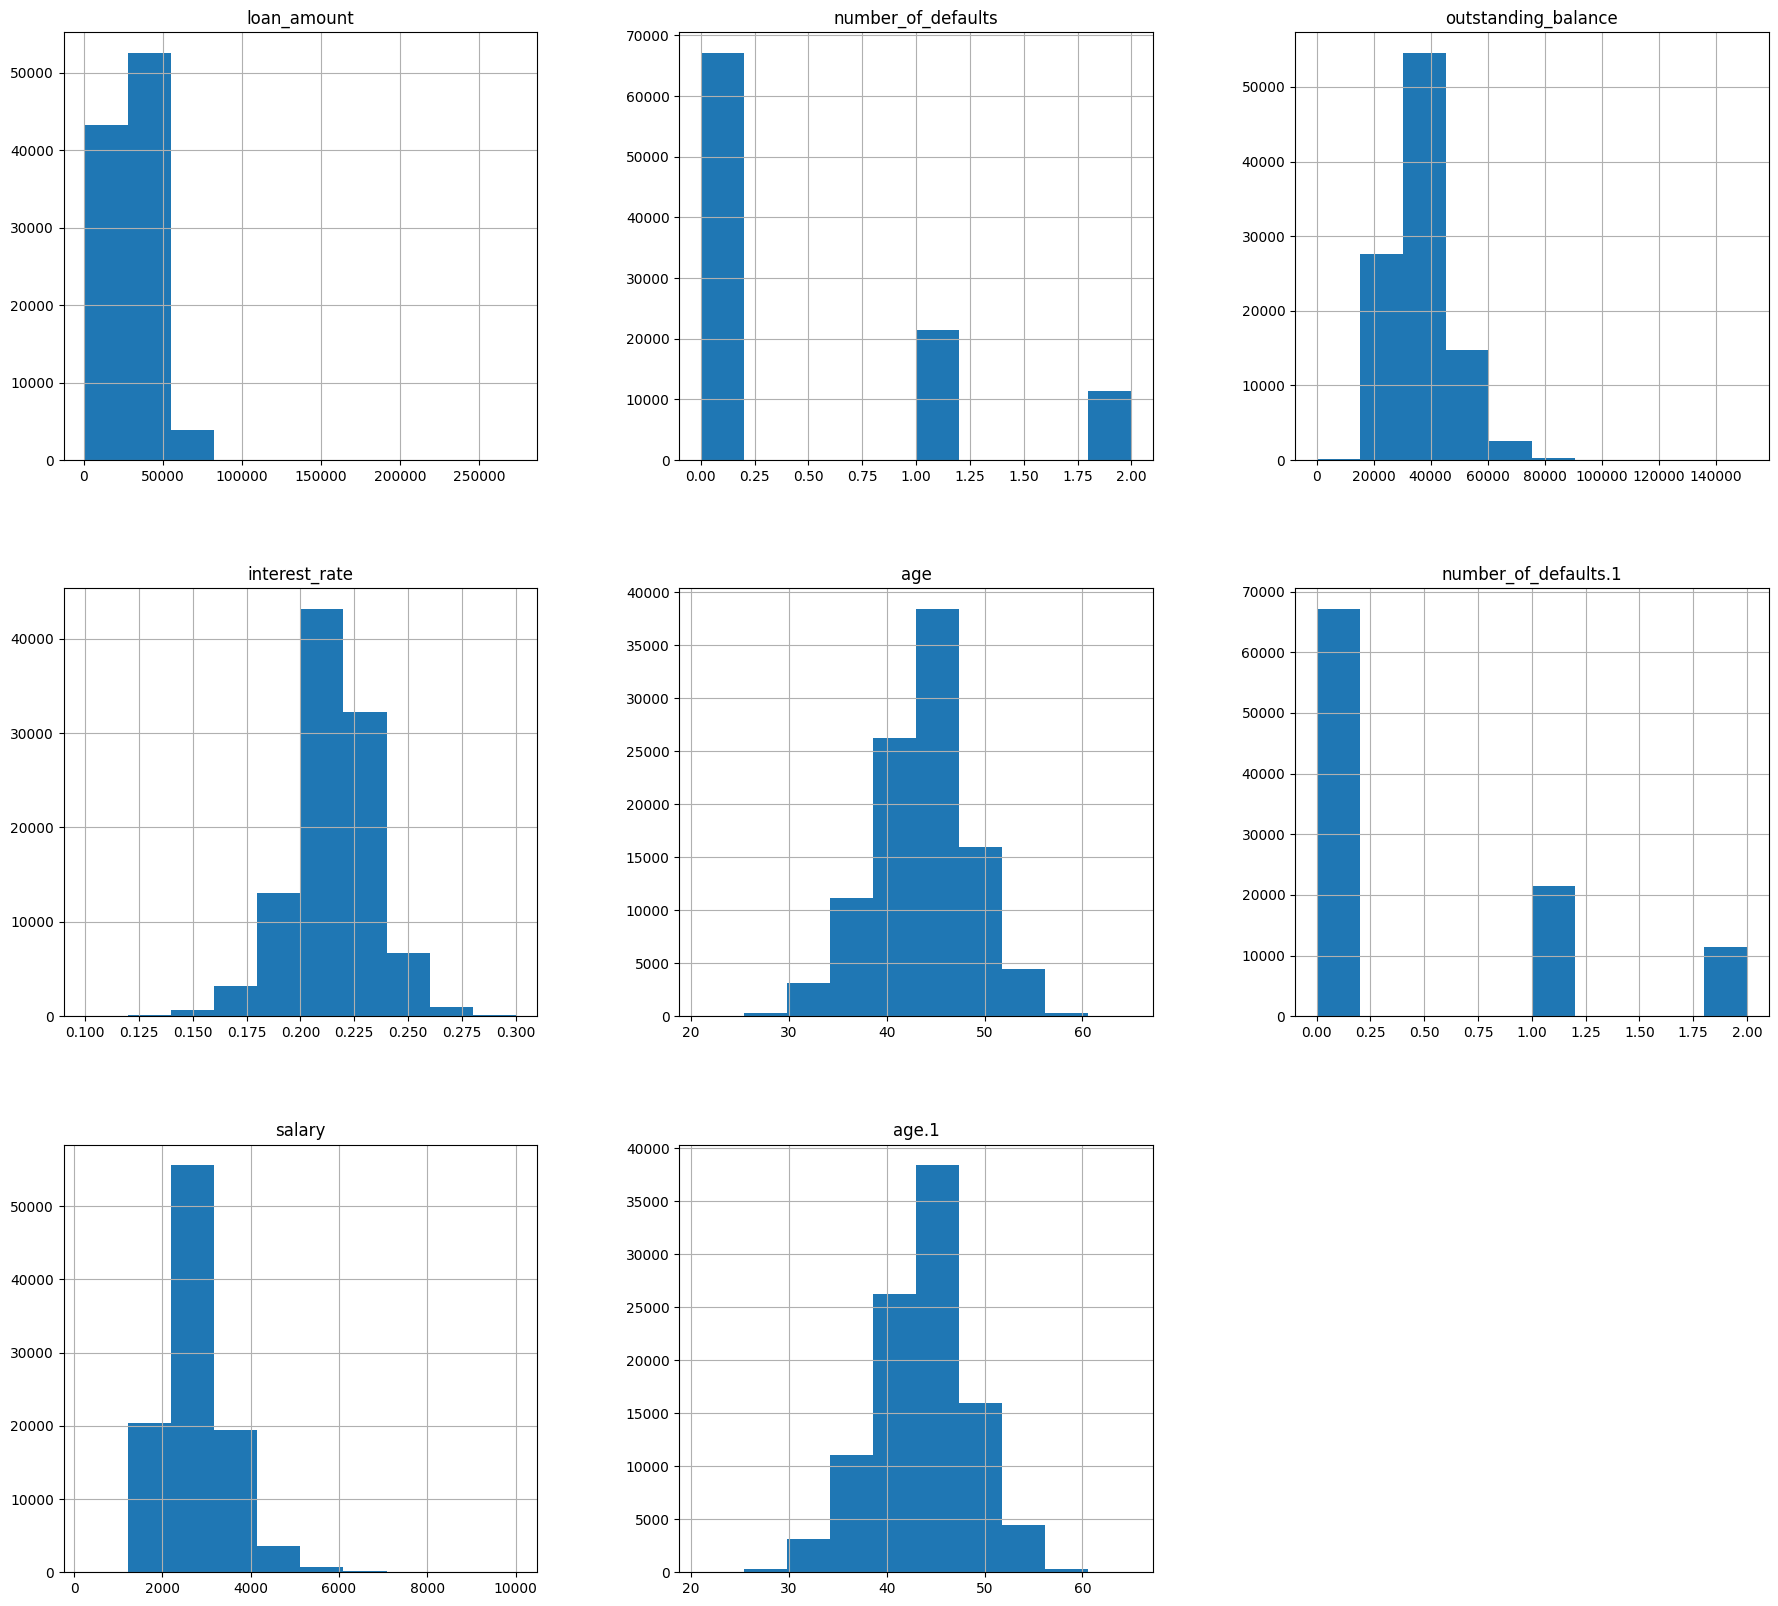

In [ ]:
df.hist(figsize=(22,20))
plt.show()

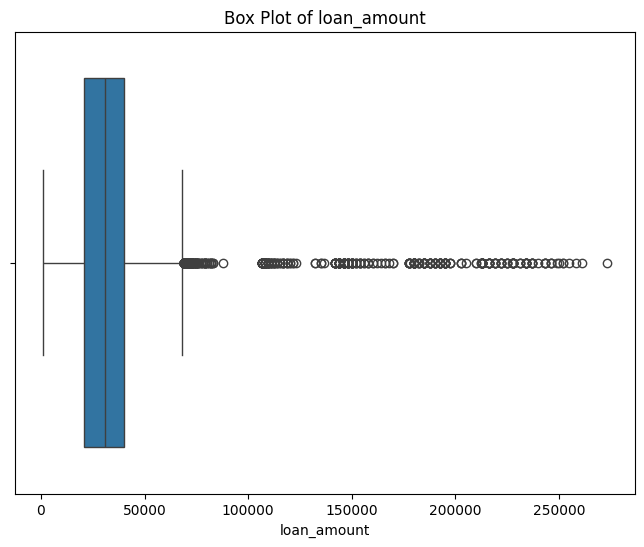

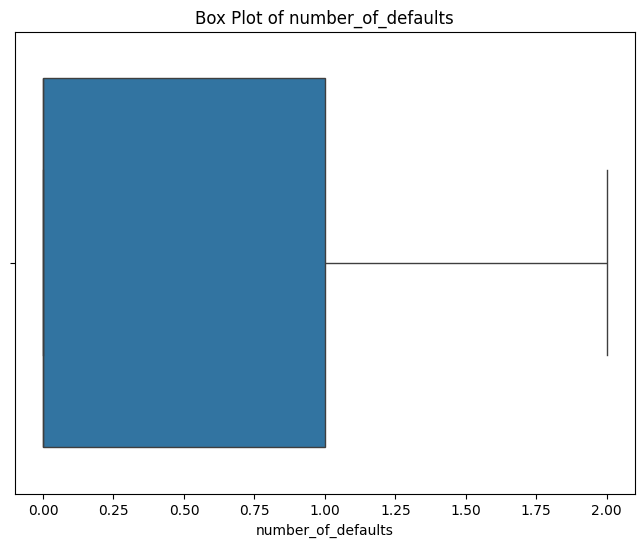

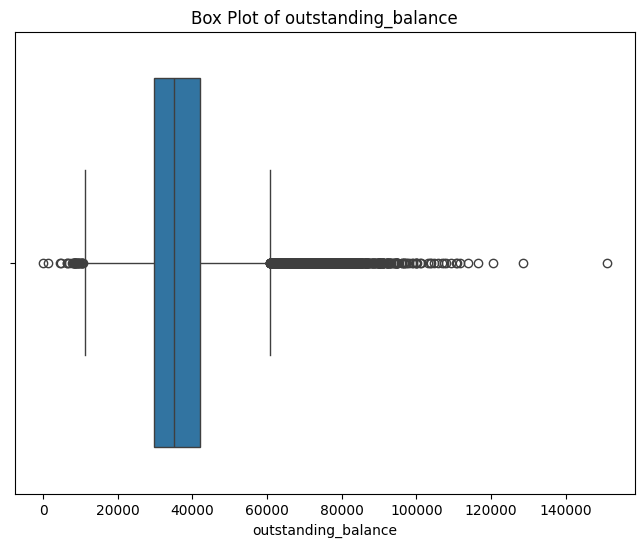

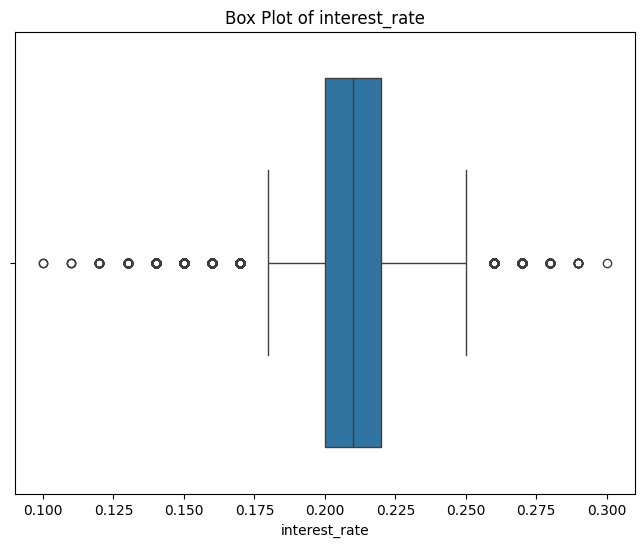

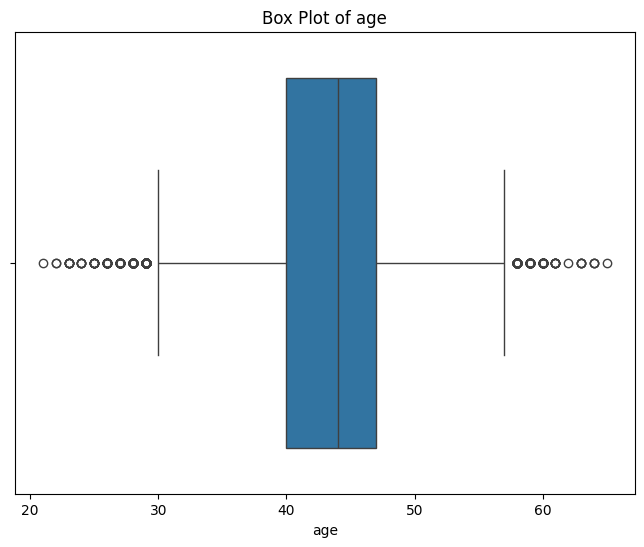

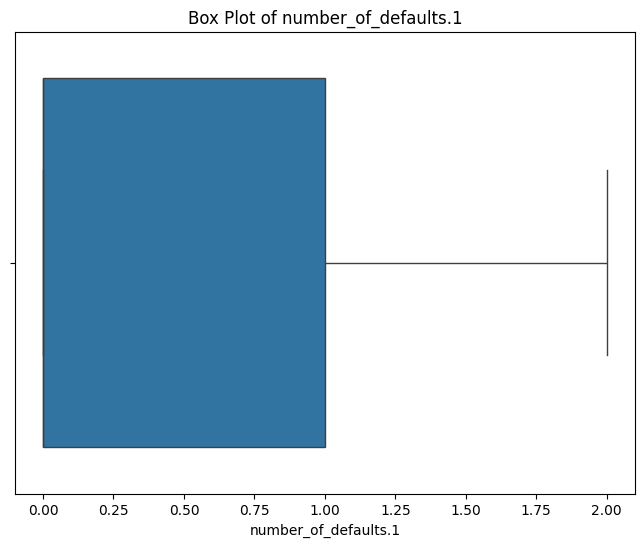

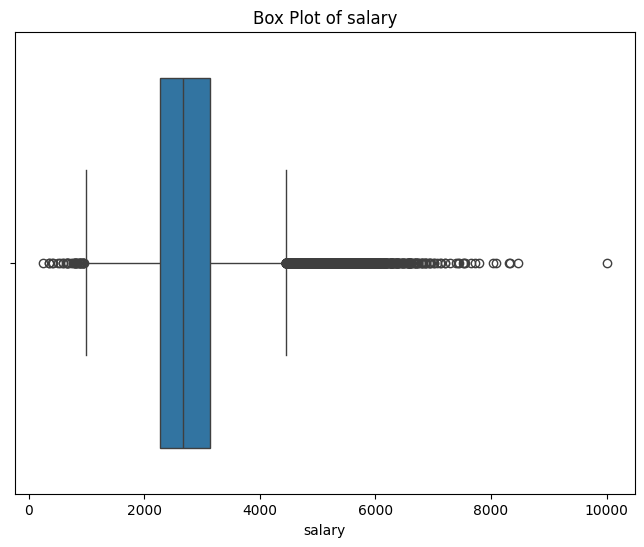

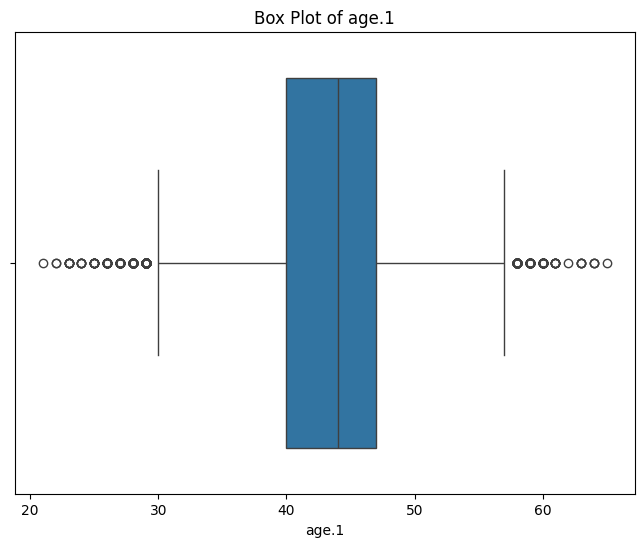

In [ ]:

# Create a box plot for each numerical feature
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

In [ ]:
# Calculating specific quantiles for age
quantiles = df['age'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01    32.0
0.25    40.0
0.50    44.0
0.75    47.0
0.99    55.0
Name: age, dtype: float64


In [ ]:
# Calculating specific quantiles for loan_amount
quantiles = df['loan_amount'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01     3000.0
0.25    21000.0
0.50    31000.0
0.75    40000.0
0.99    64000.0
Name: loan_amount, dtype: float64


In [ ]:
# Calculating specific quantiles for salary
quantiles = df['salary'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01    1705.157984
0.25    2273.929349
0.50    2665.441567
0.75    3146.577655
0.99    4986.274608
Name: salary, dtype: float64


In [ ]:
# Calculating specific quantiles for interest rate
quantiles = df['interest_rate'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01    0.16
0.25    0.20
0.50    0.21
0.75    0.22
0.99    0.26
Name: interest_rate, dtype: float64


In [ ]:
# Calculating specific quantiles for out_balance
quantiles = df['outstanding_balance'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)

0.01    22201.379828
0.25    29625.227472
0.50    35063.852394
0.75    42133.388817
0.99    68644.580177
Name: outstanding_balance, dtype: float64


>Im going to remove the top 1% and lower 1% to avoid loosing much infomation as well incorporating some extreme values for models to see these albert-unsual values.


> Checking for missing values in our dataframe.



In [ ]:
df.isnull().sum()

loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [ ]:
#Target feature
df['Loan Status'].value_counts()

Loan Status
Did not default    85134
Defaulted          14866
Name: count, dtype: int64

> Checking the balance on Loan status.

>The imbalance is observed here , as the defaults and non-default are proportionaly have big difference which leads to model predicting better on non defaults but missing a lot on defaults(minority bias).

>First 5 entries.

In [ ]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


>

> Checking if we are dealing with same currency?

In [ ]:
count_currency = df['currency']
print(count_currency.nunique())

2


>As they are two non unique values then lets see what is the other currency.

In [ ]:
df_with_other_mask= df['currency']!='USD'
df_with_other_currency= df[df_with_other_mask]
df_with_other_currency.shape
df_with_other_currency.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
1836,60c3b33d-6229-4501-a9b6-c5e92f25b8af,other,2023 09 07,$USD,Zimbabwe,other,True,Doctor,Kadoma,48000.0,0,39696.384099,0.22,49,0,45,2665.434835,married,49,Did not default
11227,6c5a5162-c21a-4bf2-8289-3926cc97a837,male,2020 01 01,$USD,Zimbabwe,male,True,Accountant,Marondera,15000.0,2,30100.462815,0.23,39,2,58,2586.125810,divorced,39,Did not default
12878,b99cffad-9ab3-4ddc-8fd3-0cbe5d658ea1,male,2020 07 05,$USD,Zimbabwe,male,True,Doctor,Redcliff,40000.0,0,33016.316831,0.20,38,0,34,2059.155842,,38,Did not default
22301,a43b2f77-2232-4c06-921a-f542fecaff9a,male,2020 05 30,$USD,Zimbabwe,male,True,Doctor,Masvingo,15000.0,0,26227.698479,0.22,38,0,51,2398.910557,divorced,38,Did not default
23224,dfa97ba9-7113-4392-a714-7ec18292ed78,other,2023 10 02,$USD,Zimbabwe,other,True,Software Developer,Rusape,34000.0,0,39024.389403,0.23,40,0,46,2572.715465,divorced,40,Did not default


In [ ]:
#Showing how many entries
df_with_other_currency.shape

(20, 20)

> Removing $ using a function, doing this so that they will be no confussion in data exploration.

In [ ]:
#Cleaning function on values in columns
def clean_currency(value):
    return re.sub(r'\$', '', value)

In [ ]:
#Applying the function
df['currency'] = df['currency'].apply(clean_currency)
print(df['currency'].nunique())

1


In [ ]:
#Checking the function
df_with_other_mask= df['currency']!='USD'
df_with_other_currency= df[df_with_other_mask]
df_with_other_currency.shape
df_with_other_currency.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status


>Succeded removing the dollar sign.

>Checking for duplicates?

In [ ]:
# Droping the duplicates rowwise
df=df.drop_duplicates()
df.shape

(100000, 20)

>From the above we have seen duplicates in sex/gender, number of defaults and age. Though they are named differently but containing same data, its unappropriate to have them.

In [ ]:
#lets drop the columns that are duplicated
#droping sex , number_of_defaults.1 and age.1
columns_to_drop =['sex', 'number_of_defaults.1', 'age.1']
df =df.drop(columns_to_drop, axis=1)

>Changing date to datime datatype and remaining term to int64 for better representation.

In [ ]:
# Using Pandas
df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'], format ='%Y %m %d')

In [ ]:
df['remaining term']= pd.to_numeric(df['remaining term'], errors= 'coerce')

>Addressing the missing values in location, country and job status

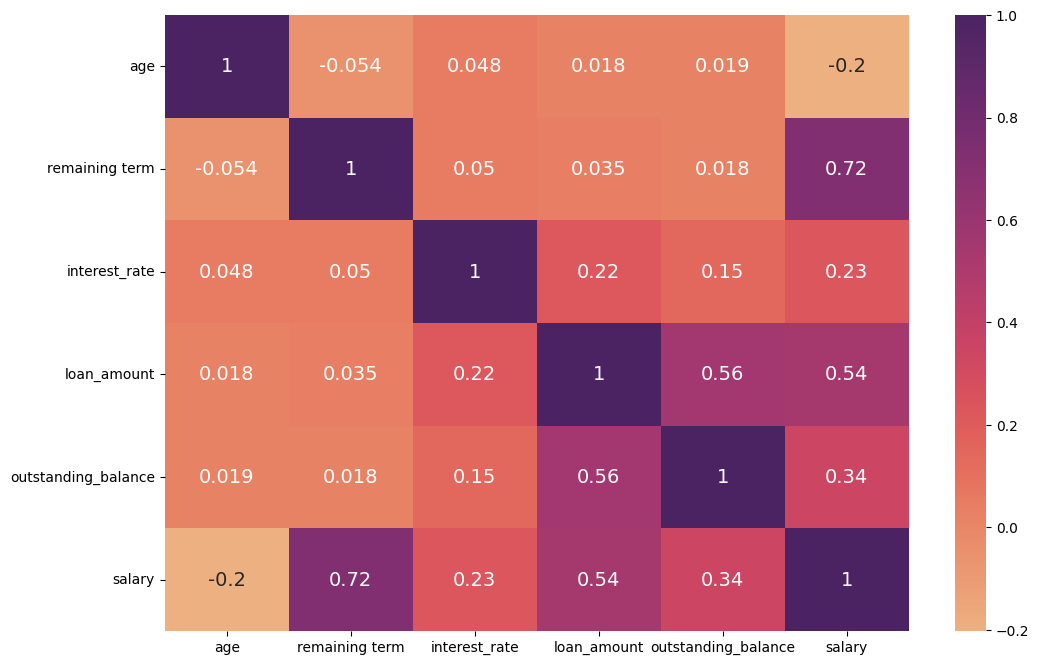

In [ ]:
fig, ax =plt.subplots(figsize =(12,8))
df1= df[['age','remaining term','interest_rate','loan_amount','outstanding_balance','salary']]
corr_matrix = df1.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap = 'flare', annot = True , ax=ax , annot_kws ={'size':14})
plt.show()

>**Remaining Term and Salary (0.72)**: A strong positive correlation indicates that as the remaining term of a loan increases, the salary of the borrower also tends to increase. This could imply that individuals with higher salaries are more likely to take out longer-term loans, perhaps because they are more confident in their ability to repay over a longer period.

>**Loan Amount and Salary (0.54)**: A moderate positive correlation suggests that individuals with higher salaries tend to take out larger loans. This makes intuitive sense, as lenders often consider income when determining loan eligibility and maximum loan amounts.

>**Loan Amount and Outstanding Balance (0.56)**: A moderate positive correlation is expected here, as the outstanding balance of a loan is directly related to the initial loan amount. The higher the loan amount, the higher the outstanding balance is likely to be, especially in the early stages of repayment.

>"While some variables showed weak correlations (less than 0.5), the strongest relationships were observed between remaining term and salary (0.72), loan amount and salary (0.54), and loan amount and outstanding balance (0.56). Dropping one of the two has been revised that due to use of Tree based models they are able to deal with these problems so that we will not loose some information in these features. "

> <b>Scatter showing correlations with higher figures.

> 1. Remaining term and salary (0.72).

Text(0.5, 1.0, 'Salary vs Remaining term')

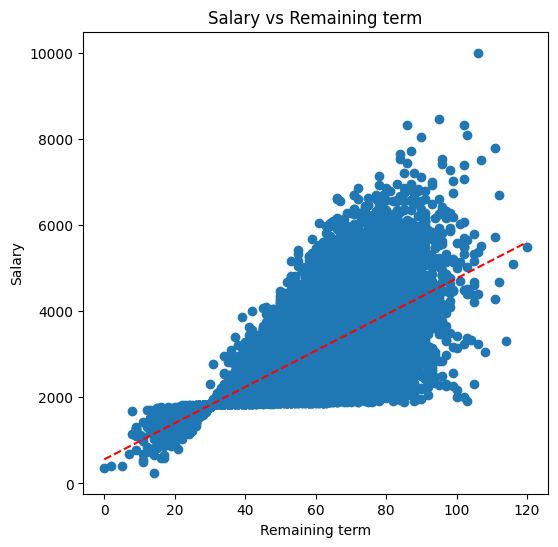

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
x=df["remaining term"]
y=df["salary"]
ax.scatter(x, y)
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")
plt.xlabel("Remaining term")
plt.ylabel("Salary")
plt.title("Salary vs Remaining term")

>2. salary vs loan_amount scatter.

Text(0.5, 1.0, 'salary vs loan_amount')

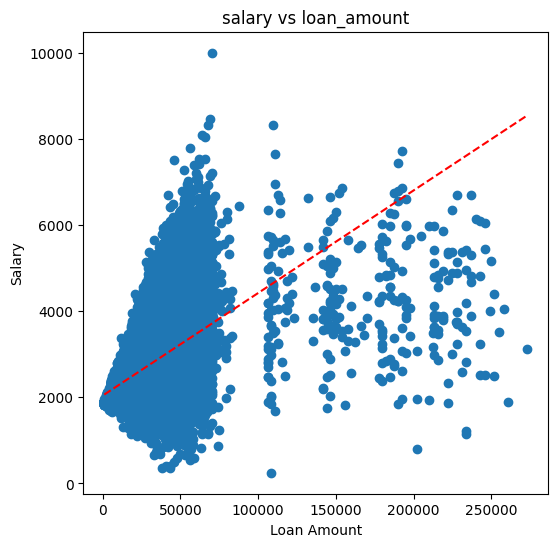

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
x=df["loan_amount"]
y=df["salary"]
ax.scatter(x, y)
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")
plt.xlabel("Loan Amount")
plt.ylabel("Salary")
plt.title("salary vs loan_amount")

>3. outstanding_balance vs loan_amount

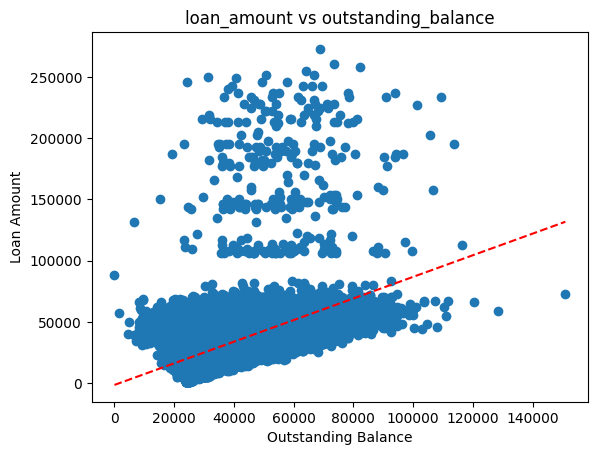

In [ ]:
x=df["outstanding_balance"]
y=df["loan_amount"]
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)  # Recalculate x_line
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")  # Plot line first
plt.scatter(x, y)  # Plot scatter after
plt.xlabel("Outstanding Balance")
plt.ylabel("Loan Amount")
plt.title("loan_amount vs outstanding_balance")
plt.show()



---



>1. Loan Status.

In [ ]:
data3 = pd.crosstab(
    index=df["number_of_defaults"],
    columns=df["Loan Status"],
    normalize=False
)

print("data type:", type(data3))
print("data shape:", data3.shape)
data3

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (3, 2)


Loan Status,Defaulted,Did not default
number_of_defaults,,
0,7517,59641
1,4375,17112
2,2974,8381


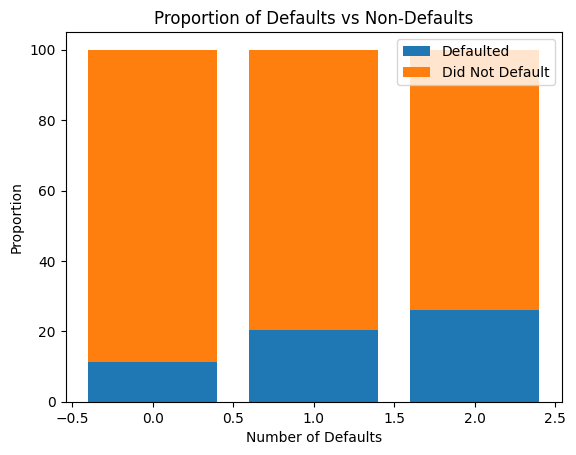

In [ ]:
# Proportion of Defaults vs Non-Defaults
number_of_defaults = [0, 1, 2]
Defaulted = [7517, 4375, 2974]
Did_not_default = [59641, 17112, 8381]

total = [i + j for i, j in zip(Defaulted, Did_not_default)]
default_proportion = [i / j * 100 for i, j in zip(Defaulted, total)]
non_default_proportion = [i / j * 100 for i, j in zip(Did_not_default, total)]

plt.bar(number_of_defaults, default_proportion, label='Defaulted')
plt.bar(number_of_defaults, non_default_proportion, bottom=default_proportion, label='Did Not Default')

plt.xlabel("Number of Defaults")
plt.ylabel("Proportion")
plt.title("Proportion of Defaults vs Non-Defaults")
_ = plt.legend()

In [ ]:
df['Loan Status'].describe()

count              100000
unique                  2
top       Did not default
freq                85134
Name: Loan Status, dtype: object



---



>2. Marital Status..

In [ ]:
data2 = pd.crosstab(
    index=df["Loan Status"],
    columns=df["marital_status"],
    normalize=False
)

print("data type:", type(data2))
print("data shape:", data2.shape)
data2

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (2, 4)


marital_status,,divorced,married,single
Loan Status,,,,
Defaulted,479,4749,6831,2807
Did not default,2648,21716,37879,22891


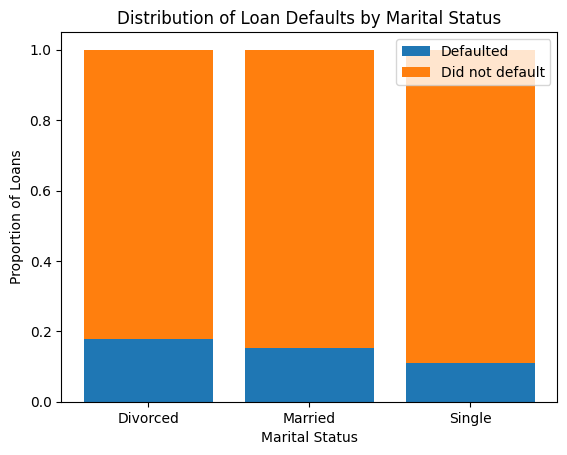

In [ ]:
#Distribution of Loan Defaults by Marital Status


defaulted = [data2['divorced'][1] / (data2['divorced'][0] + data2['divorced'][1]),
             data2['married'][1] / (data2['married'][0] + data2['married'][1]),
             data2['single'][1] / (data2['single'][0] + data2['single'][1])]
not_defaulted = [1 - defaulted[0], 1 - defaulted[1], 1 - defaulted[2]]

labels = ['Divorced', 'Married', 'Single']

plt.bar(labels, not_defaulted, label='Defaulted')
plt.bar(labels, defaulted, bottom=not_defaulted, label='Did not default')

plt.xlabel('Marital Status')
plt.ylabel('Proportion of Loans')
plt.title('Distribution of Loan Defaults by Marital Status')
_ = plt.legend()


> Divorced has highest defaults with respect to the total of their pool.

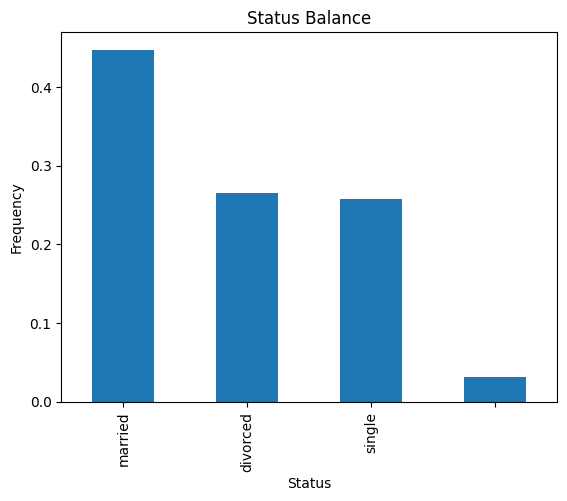

In [ ]:
# Plot class balance
df["marital_status"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Status",
    ylabel="Frequency",
    title="Status Balance"
);

> Married people are mostly the target market from the above showing a bigger chunk.

In [ ]:
print(df['marital_status'].value_counts())

marital_status
married     44710
divorced    26465
single      25698
             3127
Name: count, dtype: int64


In [ ]:
df['marital_status'].describe()

count      100000
unique          4
top       married
freq        44710
Name: marital_status, dtype: object

from the above we see other component that is anonymous later to be edited to other.



---



>3. Number of defaults

In [ ]:
data = pd.crosstab(
    index=df["Loan Status"],
    columns=df["number_of_defaults"],
    normalize=False
)

print("data type:", type(data))
print("data shape:", data.shape)
data

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (2, 3)


number_of_defaults,0,1,2
Loan Status,,,
Defaulted,7517,4375,2974
Did not default,59641,17112,8381


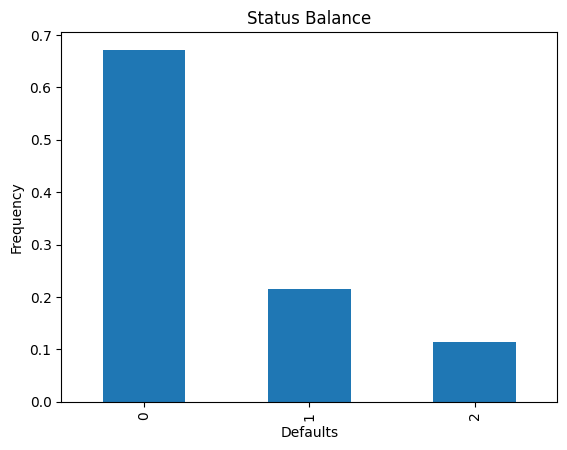

In [ ]:
 # Plot class balance
df["number_of_defaults"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Defaults",
    ylabel="Frequency",
    title="Status Balance"
);

>a good start, as majority of the clients did not default.

In [ ]:
print(df['number_of_defaults'].value_counts())

number_of_defaults
0    67158
1    21487
2    11355
Name: count, dtype: int64


In [ ]:
df['number_of_defaults'].describe()

count    100000.000000
mean          0.441970
std           0.688286
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: number_of_defaults, dtype: float64



---



>4. Locations.

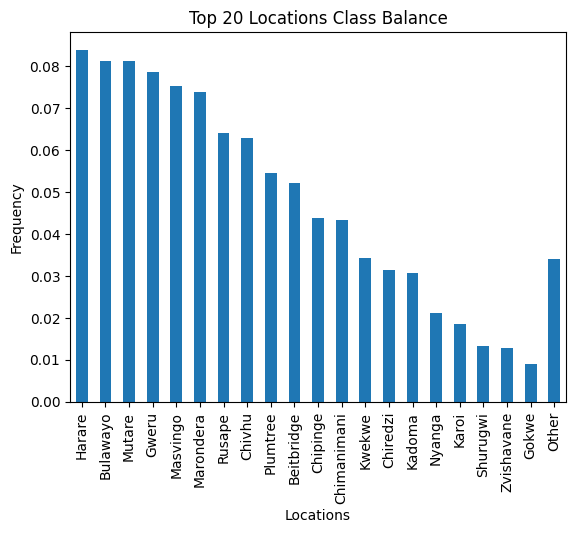

In [ ]:
top_n = 20
top_locations = df["location"].value_counts(normalize=True).nlargest(top_n)
other_locations_freq = 1 - top_locations.sum()
top_locations['Other'] = other_locations_freq

top_locations.plot(kind='bar', xlabel='Locations', ylabel='Frequency', title=f'Top {top_n} Locations Class Balance')
plt.show()

>the loans are being taken mostly in Harare and decrease as the above, so there is need to explore other locations as well.

In [ ]:
print(df['location'].value_counts().nlargest(top_n))

location
Harare         8338
Bulawayo       8078
Mutare         8062
Gweru          7803
Masvingo       7476
Marondera      7343
Rusape         6378
Chivhu         6257
Plumtree       5431
Beitbridge     5181
Chipinge       4358
Chimanimani    4296
Kwekwe         3401
Chiredzi       3123
Kadoma         3049
Nyanga         2099
Karoi          1850
Shurugwi       1322
Zvishavane     1276
Gokwe           901
Name: count, dtype: int64


In [ ]:
df['location'].describe()

count      99405
unique       157
top       Harare
freq        8338
Name: location, dtype: object

In [ ]:
unique_locations =df['location'].unique()

In [ ]:
unique_locations.shape

(158,)

In [ ]:
unique = pd.DataFrame(unique_locations, columns= ['locations'])

In [ ]:
unique.head(5)

,locations
0,Beitbridge
1,Harare
2,Gweru
3,Rusape
4,Chipinge




---



>5. Jobs.

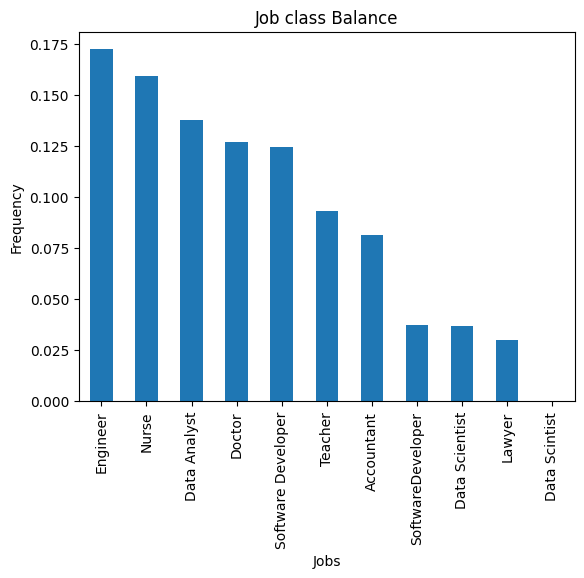

In [ ]:
 # Plot class balance
df["job"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Jobs",
    ylabel="Frequency",
    title="Job class Balance"
);

In [ ]:
print(df['job'].value_counts())

job
Engineer              16524
Nurse                 15284
Data Analyst          13204
Doctor                12186
Software Developer    11932
Teacher                8950
Accountant             7802
SoftwareDeveloper      3564
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: count, dtype: int64


In [ ]:
df['job'].describe()

count        95864
unique          11
top       Engineer
freq         16524
Name: job, dtype: object



---



>6. Loan Amount.

In [ ]:
print(df['loan_amount'].value_counts())

loan_amount
5000.0      3639
33000.0     2877
32000.0     2839
35000.0     2811
29000.0     2804
            ... 
168000.0       1
240000.0       1
178000.0       1
250000.0       1
249000.0       1
Name: count, Length: 149, dtype: int64


In [ ]:
df['loan_amount'].describe()

count    100000.000000
mean      31120.000000
std       15895.093631
min        1000.000000
25%       21000.000000
50%       31000.000000
75%       40000.000000
max      273000.000000
Name: loan_amount, dtype: float64

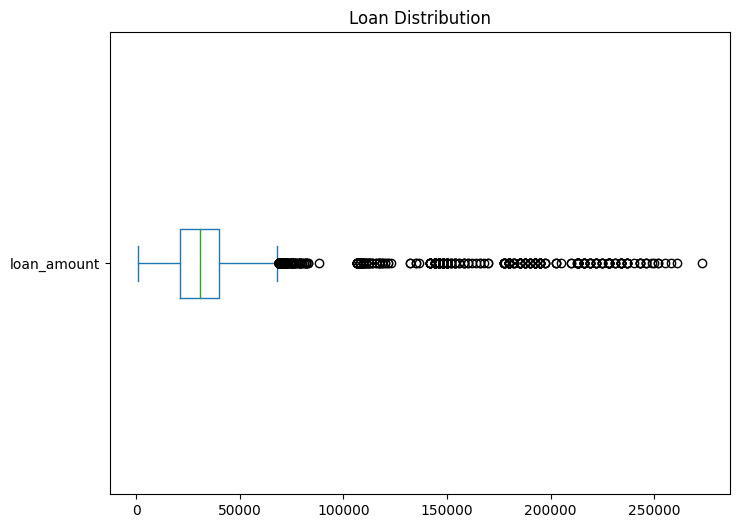

In [ ]:
fig, ax =plt.subplots(figsize= (8,6))
df['loan_amount'].plot(kind= "box", vert= False, title='Loan Distribution', ax=ax)
plt.show()



---




>7. Interest rate.

In [ ]:
print(df['interest_rate'].value_counts())

interest_rate
0.21    25514
0.22    21412
0.20    17647
0.23    10854
0.19     8743
0.24     4726
0.18     4259
0.17     2087
0.25     1964
0.16     1056
0.26      717
0.15      454
0.27      225
0.14      182
0.28       64
0.13       53
0.12       28
0.29        9
0.11        3
0.10        2
0.30        1
Name: count, dtype: int64


In [ ]:
df['interest_rate'].describe()

count    100000.000000
mean          0.210435
std           0.018725
min           0.100000
25%           0.200000
50%           0.210000
75%           0.220000
max           0.300000
Name: interest_rate, dtype: float64

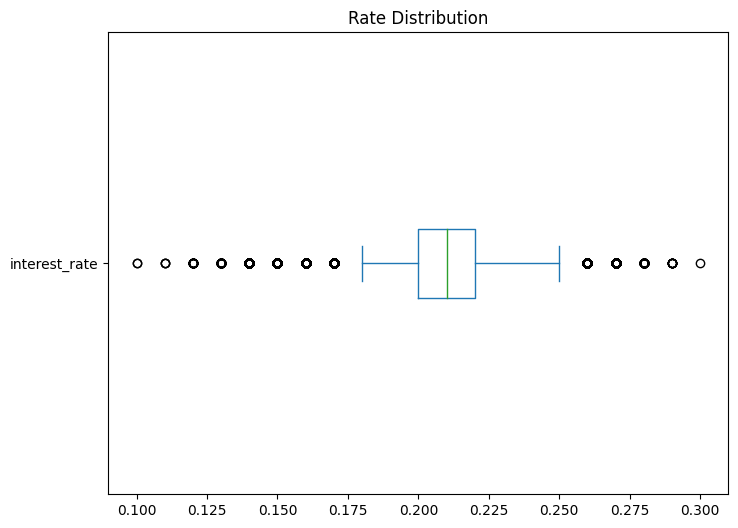

In [ ]:
fig, ax =plt.subplots(figsize= (8,6))
df['interest_rate'].plot(kind= "box", vert= False, title='Rate Distribution', ax=ax)
plt.show()



---



>8. Age.

In [ ]:
print(df['age'].value_counts())

age
43    8263
44    8245
45    7905
42    7893
46    7418
41    7089
47    6614
40    6208
48    5627
39    5024
49    4409
38    4017
50    3397
37    3141
51    2569
36    2259
52    1759
35    1695
53    1205
34    1185
33     803
54     759
32     548
55     471
31     319
56     304
30     251
57     139
29     122
58      95
28      80
59      43
27      38
60      35
26      30
25      10
23       7
61       7
24       5
63       4
64       3
22       2
62       1
21       1
65       1
Name: count, dtype: int64


In [ ]:
df['age'].describe()

count    100000.00000
mean         43.57069
std           4.86376
min          21.00000
25%          40.00000
50%          44.00000
75%          47.00000
max          65.00000
Name: age, dtype: float64

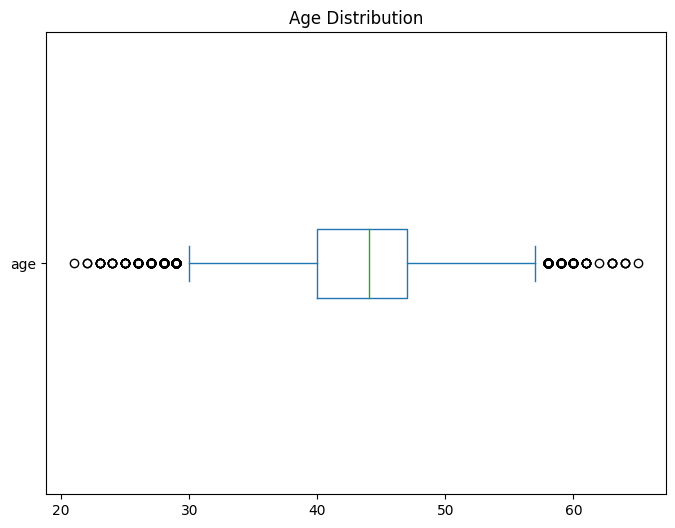

In [ ]:
fig, ax =plt.subplots(figsize= (8,6))
df['age'].plot(kind= "box", vert= False, title='Age Distribution', ax=ax)
plt.show()



---





>9. Remaining term.

In [ ]:
print(df['remaining term'].value_counts())

remaining term
51.0     3393
49.0     3381
53.0     3374
54.0     3330
50.0     3294
         ... 
2.0         1
0.0         1
7.0         1
114.0       1
5.0         1
Name: count, Length: 110, dtype: int64


In [ ]:
df['remaining term'].describe()

count    98125.000000
mean        52.892708
std         11.984802
min          0.000000
25%         45.000000
50%         52.000000
75%         61.000000
max        120.000000
Name: remaining term, dtype: float64

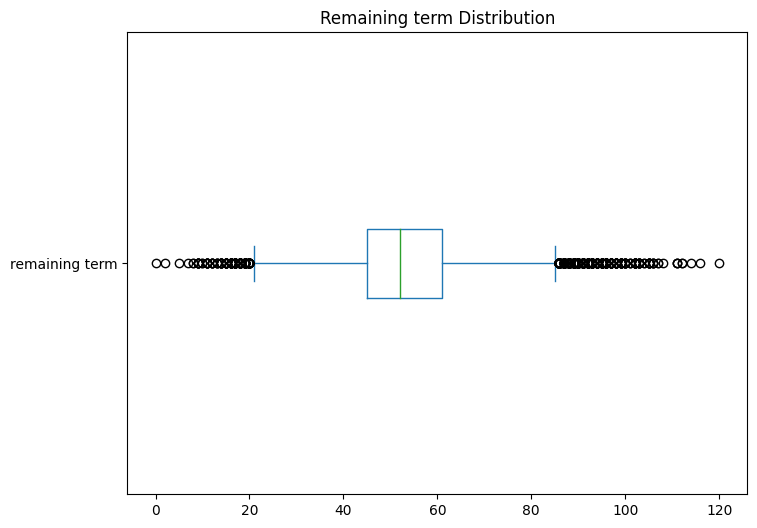

In [ ]:
fig, ax =plt.subplots(figsize= (8,6))
df['remaining term'].plot(kind= "box", vert= False, title='Remaining term Distribution', ax=ax)
plt.show()



---



>10. Salary.

In [ ]:
print(df['salary'].value_counts())

salary
3230.038869    1
2366.568768    1
1910.662717    1
3047.842940    1
2141.820483    1
              ..
1925.734322    1
3220.816426    1
3606.815823    1
2637.311845    1
2670.766532    1
Name: count, Length: 100000, dtype: int64


In [ ]:
df['salary'].describe()

count    100000.000000
mean       2781.804324
std         696.450055
min         250.000000
25%        2273.929349
50%        2665.441567
75%        3146.577655
max       10000.000000
Name: salary, dtype: float64

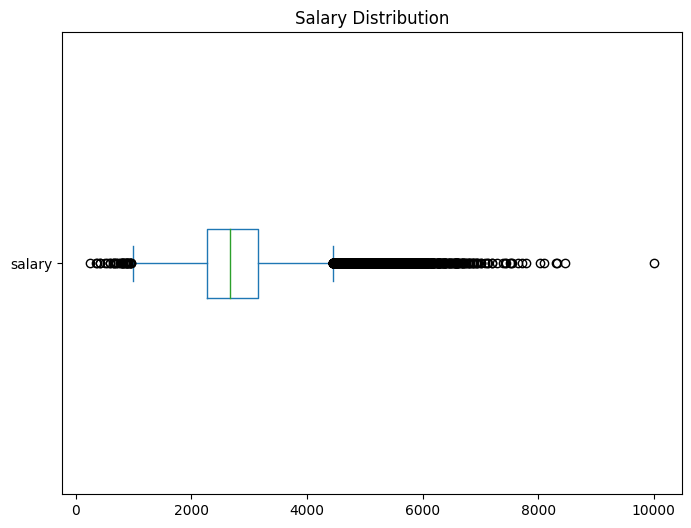

In [ ]:
fig, ax =plt.subplots(figsize= (8,6))
df['salary'].plot(kind= "box", vert= False, title='Salary Distribution', ax=ax)
plt.show()

In [ ]:
print(df['gender'].value_counts())

gender
male      35028
female    32685
other     32287
Name: count, dtype: int64


In [ ]:
df['gender'].describe()

count     100000
unique         3
top         male
freq       35028
Name: gender, dtype: object



---



>Cleaning outliers.

In [ ]:
 # remaining term
df = df[df["remaining term"]<80]

> The remaining term never get over this 80 yrs as this is confusing to say it will be there even you gone/died.

>

# Feature engineering..



---
>Checking if there are correlation between features.
corr will be done on numerical values only so i have to turn the non-numeric  to numeric by labelEncoder.



In [ ]:
# Drop the 'disbursemet_date' and loan_id column
dd= ['disbursemet_date','loan_id']
df = df.drop(dd, axis=1)
# Select non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Apply LabelEncoder to each non-numeric column
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

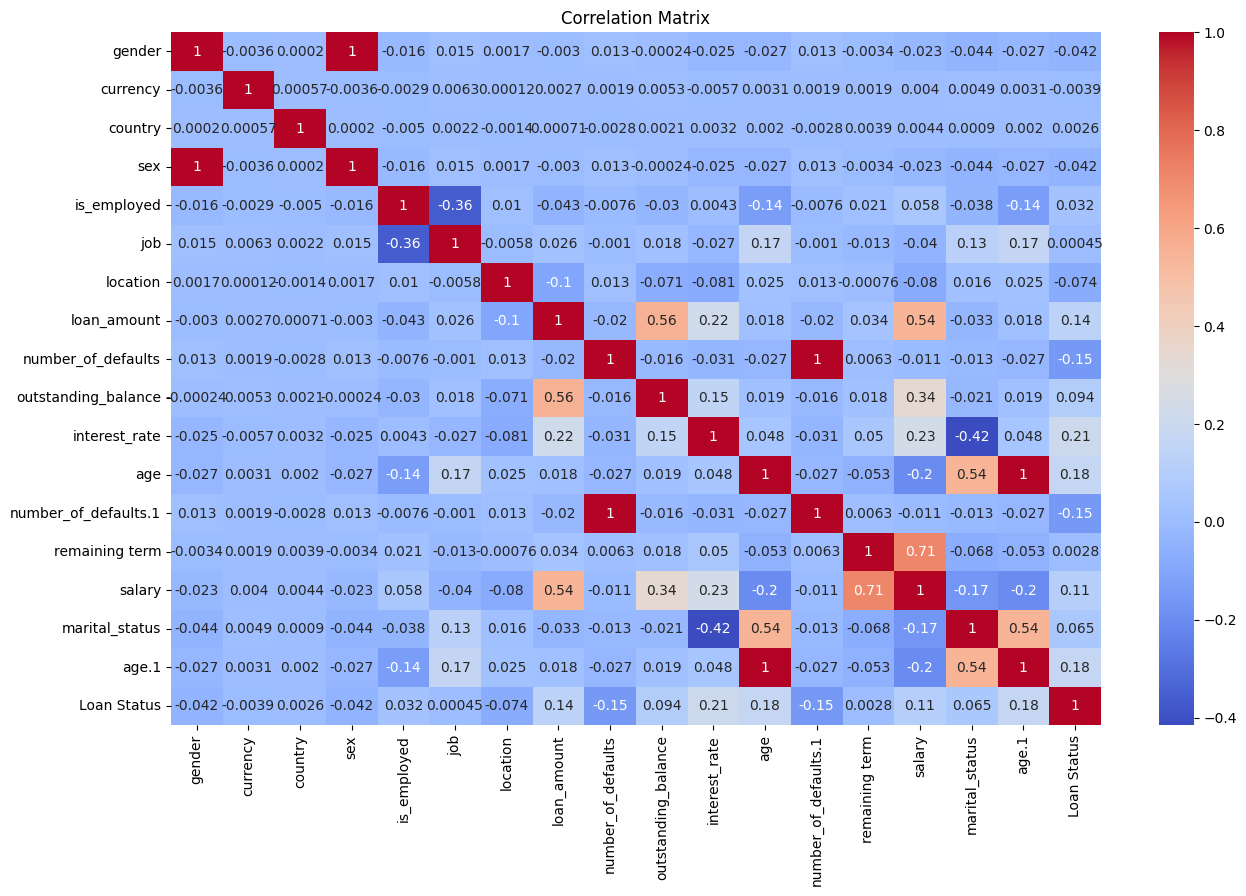

In [ ]:
# Calculate correlation matrix (if you haven't already)
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(15, 9))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

>**Notes:**
Features need to be dropped because of correlation matrix high values, decision is to be done by Random Forest Regressor.

>As we are seeing on the correlation matrix sex and gender ,number_of_defaults and number_of_defaults.1, age and age.1 show a strong correlation we need to drop one of them for every two correlated. Lets try Random Forest Regressor.

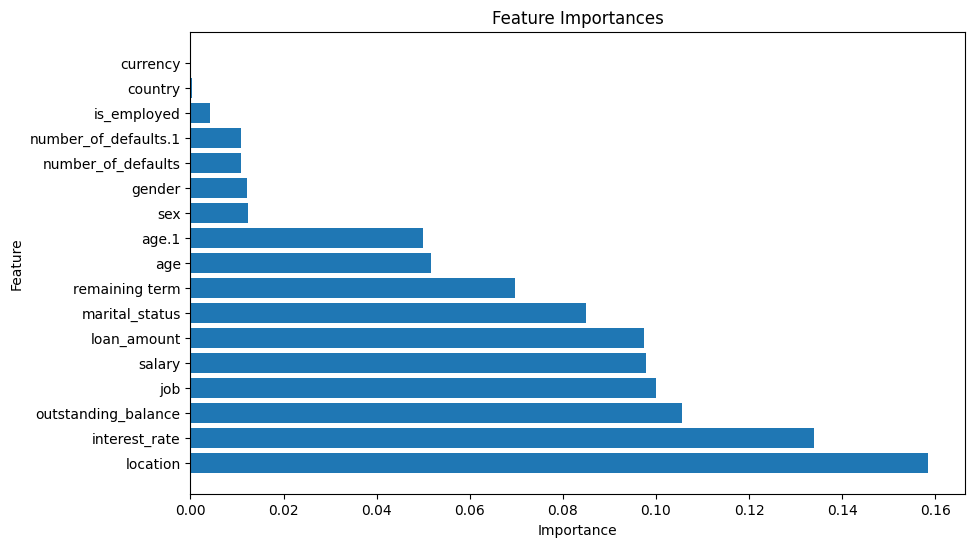

In [ ]:
from sklearn.ensemble import RandomForestRegressor
df.dropna(inplace=True)
X = df.drop('Loan Status', axis=1)  # Features
y = df['Loan Status']  # Target variable
# 'X' contains our features and 'y' is your target variable
model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

>As we see on the above , currency and country has no significants, number_of_defaults and number_of_defaults.1 , gender and sex have same contribution to the model hence one of them should drop.

>**Columns to drop:**


*   number_of_defaults.1
*   sex
*   currency
*   country



In [ ]:
df.head()

,gender,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,1,1,0,1,10,89,39000.0,0,48653.011473,0.22,37,0,114,3230.038869,2,37,1
1,2,1,1,2,1,10,113,27000.0,2,28752.062237,0.20,43,2,160,3194.139103,3,43,1
2,2,1,1,2,1,7,110,35000.0,1,44797.554126,0.22,43,1,145,3330.826656,2,43,1
3,0,1,1,0,1,4,145,24000.0,0,35681.496413,0.23,47,0,99,2246.797020,1,47,1
4,1,1,1,1,1,7,98,19000.0,0,34156.055882,0.20,42,0,108,2310.858441,2,42,1


>Taking raw data again to go through transformation arcodingly.

In [ ]:
df = pd.read_csv("data_science_competition_2024.csv", index_col=0)

#### Cleaning of the data with aspects observed(a comprehensive/shorter way).

In [ ]:
# Summarry of data Cleaning of dataframe of loans
def wrangle(df):
    def clean_currency(value):
        return re.sub(r'\$', '', value)
    def empty_strings(series):
        return series.replace(r'^\s*$', 'other', regex = True)

    df['currency'] = df['currency'].astype(str)
    df['marital_status'] = df['marital_status'].astype(str)
        #cleaning dollar sign on currency
    df['currency'] = df['currency'].apply(clean_currency)

    #cleaning empty strings on marital status
    df['marital_status'] = empty_strings(df['marital_status'])
    # Droping the duplicates rowwise
    df=df.drop_duplicates()




    df= df.rename(columns={"remaining term" : "remaining_term"})
    df= df.rename(columns={"Loan Status" : "Loan_Status"})

        # Using Pandas to change their datatypes
    df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'],
                                              format ='%Y %m %d')
    df['remaining_term']= pd.to_numeric(df['remaining_term'], errors= 'coerce')

    #removing outliers
    # 1. remaining term
    df = df[df["remaining_term"]<80]


    # outlier ...interest rate--
    i1, i9 = df["interest_rate"].quantile([0.01, 0.99])
    mask = df["interest_rate"].between(i1, i9)
    df = df[mask]

    # outlier ...loan amount--
    l1, l9 = df["loan_amount"].quantile([0.01, 0.99])
    mask2 = df["loan_amount"].between(l1, l9)
    df = df[mask2]

    # outlier ...outstanding balance--
    o1, o9 = df["outstanding_balance"].quantile([0.01, 0.99])
    mask3 = df["outstanding_balance"].between(o1, o9)
    df = df[mask3]

    # outlier ...age--
    a1, a9 = df["age"].quantile([0.01, 0.99])
    mask4 = df["age"].between(a1, a9)
    df = df[mask4]

    #lets drop the columns that are correlated
    # Droping sex , number_of_defaults.1, age.1 and currency and country
    columns_to_drop =['sex', 'number_of_defaults.1', 'age.1','currency', 'country']
    df =df.drop(columns_to_drop, axis=1)

    #Droping null values
    df=df.dropna(how='any')
    df=df.reset_index(drop=True)

    return df

>With wrangle function im cleaning the df at once with observed issues on data exploration.

In [ ]:
df = wrangle(df)

In [ ]:
df.isnull().sum()

loan_id                0
gender                 0
disbursemet_date       0
is_employed            0
job                    0
location               0
loan_amount            0
number_of_defaults     0
outstanding_balance    0
interest_rate          0
age                    0
remaining_term         0
salary                 0
marital_status         0
Loan_Status            0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
for col in ['gender', 'is_employed']:
    df[col] = label_encoder.fit_transform(df[col])

>Label encoding converts categorical values into numerical labels, allowing the model to understand and utilize the information contained in these features.

In [ ]:
df.head()

,loan_id,gender,disbursemet_date,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,Loan_Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022-10-29,0,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47.0,3230.038869,married,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020-06-06,0,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62.0,3194.139103,single,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023-09-29,0,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57.0,3330.826656,married,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,0,2022-06-22,0,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,42.0,2246.797020,divorced,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,1,2023-02-08,0,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,45.0,2310.858441,married,Did not default


## Feature engineering using OneHotEncoder.

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output= False)
df['Loan_Status'] = onehot_encoder.fit_transform(df['Loan_Status'].values.reshape(-1, 1) )

>One-Hot Encoding ensures that each category is represented equally in the feature space, preventing any single category from dominating the learning process due to a higher numerical label.

In [ ]:
categ_features = [ 'job', 'location', 'marital_status']

striped = df.drop(categ_features, axis=1)

onehot_encoder = OneHotEncoder(sparse_output = False)
# Transform the features, rename the columns with the _count suffix, and join to dataframe
df1 = onehot_encoder.fit_transform(df[categ_features])

encoded_df = pd.DataFrame(df1)

encoded_df.columns = onehot_encoder.get_feature_names_out(categ_features)
df1 = pd.concat([striped, encoded_df], axis=1, join ='inner')

>This prepares the categorical features for use in machine learning models that require numerical input. One-Hot Encoding is crucial for handling categorical data without implying any ordinal relationships between categories.

>One-Hot Encoding is the appropriate choice for your categorical features because it accurately represents their nominal nature, avoids potential misinterpretations, and enables effective use of these features in machine learning models.

In [ ]:
df1.head()

,loan_id,gender,disbursemet_date,is_employed,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,...,location_Victoria Falls,location_Victoria Falls,location_Victoria Falls,location_Zvishavane,location_Zvishavane,location_Zvishavane,marital_status_divorced,marital_status_married,marital_status_other,marital_status_single
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,0,2022-10-29,0,39000.0,0,48653.011473,0.22,37,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,368bf756-fcf2-4822-9612-f445d90b485b,2,2020-06-06,0,27000.0,2,28752.062237,0.20,43,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,2,2023-09-29,0,35000.0,1,44797.554126,0.22,43,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,191c62f8-2211-49fe-ba91-43556b307871,0,2022-06-22,0,24000.0,0,35681.496413,0.23,47,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,477cd8a1-3b01-4623-9318-8cd6122a8346,1,2023-02-08,0,19000.0,0,34156.055882,0.20,42,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


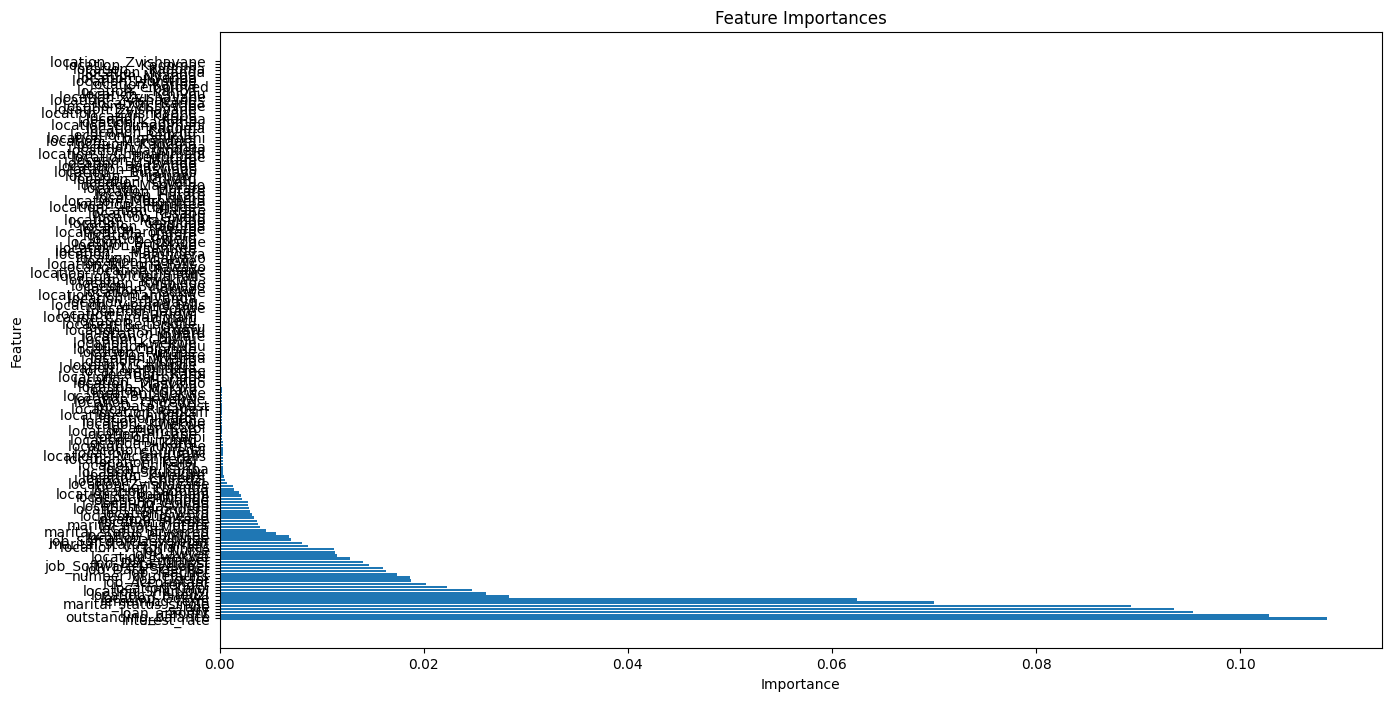

In [ ]:
dd1 = ['Loan_Status','disbursemet_date','loan_id']
# Drop the 'disbursemet_date' and loan_id column
X = df1.drop(dd1, axis=1)
# Select non-numeric columns
y = df1['Loan_Status']  # Target variable
# 'X' contains our features and 'y' is your target variable
model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 15))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

>As we are observing many features are irrelevant lets see which are important.
>Setting threshold to 0.01 so that all features not important as currency and country should be dropped.

In [ ]:
threshold = 0.01
features_to_drop = X.columns[importances < threshold]
X_reduced = X.drop(features_to_drop, axis=1)

In [ ]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85600 entries, 0 to 85599
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  85600 non-null  int64  
 1   loan_amount             85600 non-null  float64
 2   number_of_defaults      85600 non-null  int64  
 3   outstanding_balance     85600 non-null  float64
 4   interest_rate           85600 non-null  float64
 5   age                     85600 non-null  int64  
 6   remaining_term          85600 non-null  float64
 7   salary                  85600 non-null  float64
 8   job_Accountant          85600 non-null  float64
 9   job_Data Analyst        85600 non-null  float64
 10  job_Data Scientist      85600 non-null  float64
 11  job_Doctor              85600 non-null  float64
 12  job_Engineer            85600 non-null  float64
 13  job_Lawyer              85600 non-null  float64
 14  job_Nurse               85600 non-null

>**Added Features contributing to the models are as follows:**
* job_Accountant         
*job_Data Analyst
*job_Data Scientist
* job_Doctor
* job_Engineer
*job_Lawyer
*job_Nurse
* job_Software Developer
* job_Teacher
*location_Chiredzi
*location_Gokwe
* location_Karoi
* location_Kwekwe
*location_Shurugwi
*  marital_status_single



---



## Split.

>Creating our feature matrix <b>X</b> and target vector <b>y</b>. Our target is "Loan Status"

>Selecting features where based on domain knowledge, 'loan_id','disbursemet_date', 'currency', these are not going to contribute anything to the learning of the algorythm.
>And these from regressor we romove them as they contribute nothing.

In [ ]:
X = X_reduced
y = df1['Loan_Status']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (85600, 23)
y shape: (85600,)



>Dealing with the imbalance!


>Since we're not working with time series data, we're going to randomly divide our dataset into training and test sets using train_test_split.

>Essential for assessing the true performance of a machine learning model and ensuring that it can generalize to new data, ultimately leading to more reliable and effective predictions.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (77040, 23)
y_train shape: (77040,)
X_test shape: (8560, 23)
y_test shape: (8560,)


## Resampling.

>Creating a new feature matrix by performing random over-sampling, undersampling and smote on the training data. Addressing imbalanced classes.

###  Oversampling.



---

By increasing the number of samples in the minority class, oversampling helps the model learn the patterns and characteristics of that class more effectively.
This leads to better predictions and reduced bias towards the majority class.

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)

X_train_over shape: (133908, 23)


In [ ]:
import collections

# Count class occurrences
counter = collections.Counter(y_train_over)
print(counter)

Counter({0.0: 66954, 1.0: 66954})


> We now have class balance after oversampling and an advantage of data increased enhencenncing model perfomance.

###  Undersampling.



---
Undersampling helps level the playing field by reducing the dominance of the majority class, allowing the model to focus more on the minority class.


In [ ]:
under_sampler =RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)

(20172, 23)


In [ ]:
# Count class occurrences
counter = collections.Counter(y_train_under)
print(counter)

Counter({0.0: 10086, 1.0: 10086})


>Class is balanced but reduced data for our model, perfomance is affected in this cost.

###  Synthetic Minority Over-sampling Technique.



---

By providing the model with a more diverse set of minority class examples, SMOTE helps it learn to generalize better to unseen data from that class.

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=8)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled.shape)

(133908, 23)


In [ ]:
# Count class occurrences
counter = collections.Counter(y_resampled)
print(counter)

Counter({0.0: 66954, 1.0: 66954})


>Same as oversampling it enhances data availability.



---



---



# Scaling data.



---
**Use of StandardScaler**.
Standardizing features can help reduce the impact of outliers, as they are scaled down relative to the other data points.

1. oversampled data.

In [ ]:
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled_over = pd.DataFrame(scaler.fit_transform(X_train_over), columns=X_train_over.columns)

# Transform the test data using the same scaler
X_test_scaled_over = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



---



2. undersampled data

In [ ]:
# Fit and transform the training data
X_train_scaled_under = pd.DataFrame(scaler.fit_transform(X_train_under), columns=X_train_under.columns)

# Transform the test data using the same scaler
X_test_under = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



---



3. raw data.

In [ ]:
# Fit and transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)




---



4. SMOTE data.

In [ ]:
# Fit and transform the training data
X_train_smote = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X_resampled.columns)

# Transform the test data using the same scaler
X_test_smote = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)




---



---





# 1. Model building.

>*Now* that we have our data set up the right way, we can build the model. 🏗

>Baseline accuracy score for our data.

In [ ]:
majority_class = y_train.mode()[0]
baseline_accuracy = (y_train == majority_class).mean()
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8690809968847352


## a) XGBoostClassifier.



---

In my models i used GridSearch as it systematically explores a specified range of hyperparameter values to find the combination that yields the best model performance. or in short Automated Hyperparameter Optimization(AHO).

In [123]:
import os
os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=false intra_op_parallelism_threads=1"
# oversampled data model.
pipe = Pipeline([
    ('scaling', FunctionTransformer(lambda x:x)),
    ('xgboost', XGBClassifier(objective= 'binary:logistic'))
])

parameters = {'xgboost__max_depth': [70],
              'xgboost__n_estimators' : [100],
              'xgboost__learning_rate' : [0.09],
              'xgboost__tree_method': ['hist'],
              'xgboost__min_child_weight': [1],
              'xgboost__gamma': [0.5],
              'xgboost__subsample': [0.8],
              'xgboost__colsample_bytree': [0.8],
              'xgboost__scale_pos_weight': [4]
              }


gs = GridSearchCV(pipe, parameters, cv=10, scoring='roc_auc', n_jobs=-1, verbose=10)

gs.fit(X_train_scaled_over, y_train_over)

best_model = gs.best_estimator_
y_test_proba = best_model.predict_proba(X_test_scaled)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('LR ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))
print(f"Accuracy: {accuracy:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
LR ROC AUC: 0.8301110619790658
Accuracy: 0.8259


(0.0, 1.05)

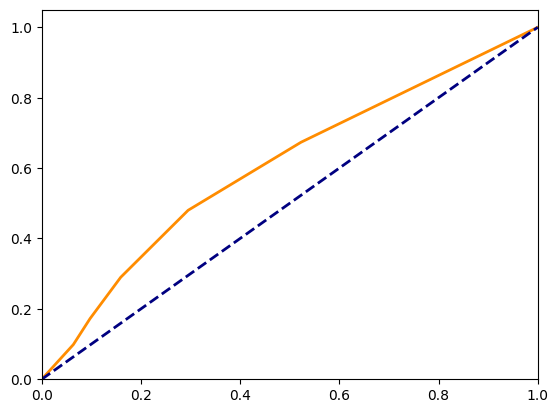

In [124]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

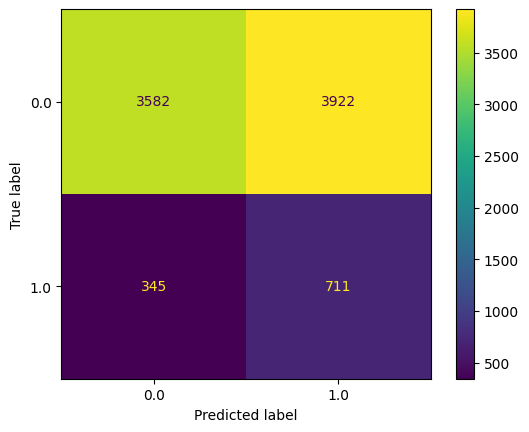

In [125]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [129]:
# Get the confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.4773454157782516
F1 Score: 0.6267168226751816




---



In [130]:
# undersampled data model.

pipe1 = Pipeline([
    ('scaling', FunctionTransformer(lambda x:x)),
    ('xgboost', XGBClassifier(objective= 'binary:logistic'))
])

parameters = {'xgboost__max_depth': [70],
              'xgboost__n_estimators' : [100],
              'xgboost__learning_rate' : [0.09],
              'xgboost__tree_method': ['hist'],
              'xgboost__min_child_weight': [1],
              'xgboost__gamma': [0.5],
              'xgboost__subsample': [0.8],
              'xgboost__colsample_bytree': [0.8],
              'xgboost__scale_pos_weight': [4]
              }


gs1 = GridSearchCV(pipe1, parameters, cv=10, scoring='roc_auc', n_jobs=-1, verbose=10)

gs1.fit(X_train_scaled_under, y_train_under)

best_model1 = gs1.best_estimator_
y_test_proba1 = best_model1.predict_proba(X_test_under)
y_pred1 = best_model1.predict(X_test_under)
accuracy1 = accuracy_score(y_test, y_pred1)
print('LR ROC AUC:', roc_auc_score(y_test, y_test_proba1[:, 1]))
print(f"Accuracy: {accuracy1:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
LR ROC AUC: 0.852187419234994
Accuracy: 0.7369


(0.0, 1.05)

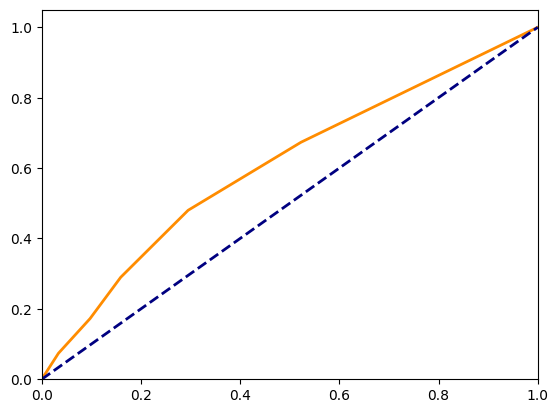

In [131]:
y_pred_proba = best_model1.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

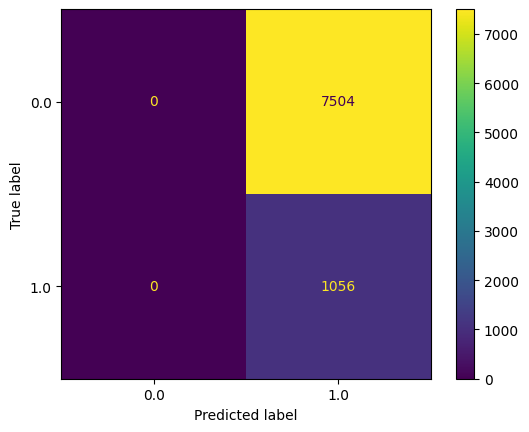

In [132]:
ConfusionMatrixDisplay.from_estimator(best_model1, X_test, y_test)

In [133]:
# Get the confusion matrix
cm = confusion_matrix(y_test, best_model1.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-133-656788b9ca26>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)




---



In [134]:
# not edited data model.
import os

os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=false intra_op_parallelism_threads=1"
pipe2 = Pipeline([
    ('scaling', FunctionTransformer(lambda x:x)),
    ('xgboost', XGBClassifier(objective= 'binary:logistic'))
])

parameters = {'xgboost__max_depth': [70],
              'xgboost__n_estimators' : [100],
              'xgboost__learning_rate' : [0.09],
              'xgboost__tree_method': ['hist'],
              'xgboost__min_child_weight': [1],
              'xgboost__gamma': [0.5],
              'xgboost__subsample': [0.8],
              'xgboost__colsample_bytree': [0.8],
              'xgboost__scale_pos_weight': [4]
              }


gs2 = GridSearchCV(pipe2, parameters, cv=10, scoring='roc_auc', n_jobs=-1, verbose=10)

gs2.fit(X_train_scaled, y_train)

best_model2 = gs2.best_estimator_
y_test_proba2 = best_model2.predict_proba(X_test_scaled)
y_pred2 = best_model2.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test, y_pred2)
print('LR ROC AUC:', roc_auc_score(y_test, y_test_proba2[:, 1]))
print(f"Accuracy: {accuracy2:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
LR ROC AUC: 0.8590278366689281
Accuracy: 0.9230


(0.0, 1.05)

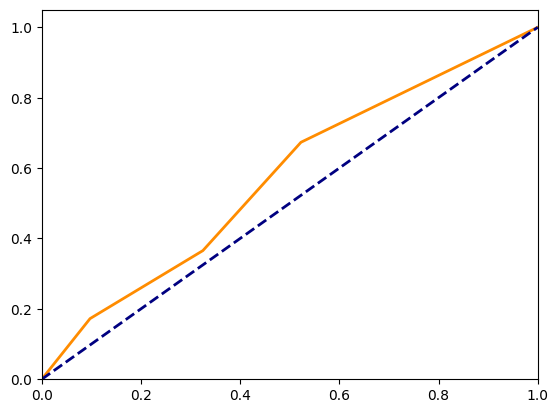

In [135]:
y_pred_proba = best_model2.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

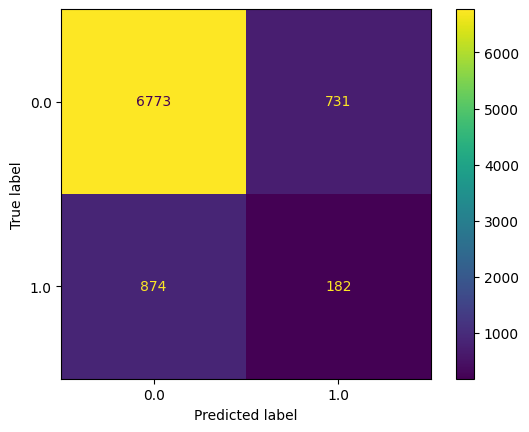

In [136]:
ConfusionMatrixDisplay.from_estimator(best_model2, X_test, y_test)

In [137]:
# Get the confusion matrix
cm = confusion_matrix(y_test, best_model2.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9025852878464818
F1 Score: 0.8940663982575408


---

In [138]:
# smote data model.
pipe3 = Pipeline([
    ('scaling', FunctionTransformer(lambda x:x)),
    ('xgboost', XGBClassifier(objective= 'binary:logistic'))
])

parameters = {'xgboost__max_depth': [70],
              'xgboost__n_estimators' : [100],
              'xgboost__learning_rate' : [0.09],
              'xgboost__tree_method': ['hist'],
              'xgboost__min_child_weight': [1],
              'xgboost__gamma': [0.5],
              'xgboost__subsample': [0.8],
              'xgboost__colsample_bytree': [0.8],
              'xgboost__scale_pos_weight': [4]
              }


gs3 = GridSearchCV(pipe3, parameters, cv=10, scoring='roc_auc', n_jobs=-1, verbose=10)

gs3.fit(X_train_smote, y_resampled)

best_model3 = gs3.best_estimator_
y_test_proba3 = best_model3.predict_proba(X_test_smote)
y_pred3 = best_model3.predict(X_test_smote)
accuracy3 = accuracy_score(y_test, y_pred3)
print('LR ROC AUC:', roc_auc_score(y_test, y_test_proba3[:, 1]))
print(f"Accuracy: {accuracy3:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
LR ROC AUC: 0.8567048331798798
Accuracy: 0.9235


(0.0, 1.05)

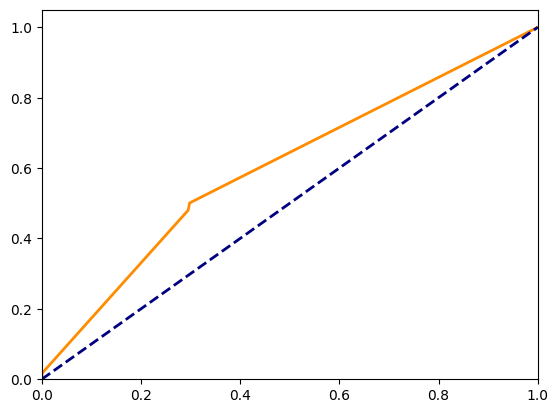

In [139]:
y_pred_proba = best_model3.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

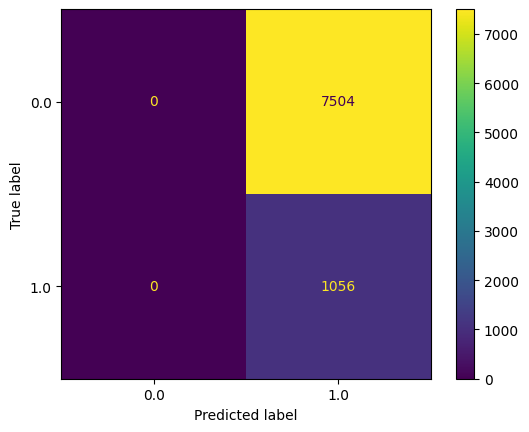

In [140]:
ConfusionMatrixDisplay.from_estimator(best_model3, X_test, y_test)

In [141]:
# Get the confusion matrix
cm = confusion_matrix(y_test, best_model3.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-141-cce89eb486a6>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


In [142]:
# Assuming you have variables storing the model names and metrics
model_names = ['best_model','best_model1', 'best_model2', 'best_model3']
roc_auc_scores = [0.8301110619790658, 0.852187419234994,0.8590278366689281, 0.8567048331798798]
accuracy_scores = [0.8259, 0.7369, 0.9230, 0.9235]
Precision = [0.4773454157782516, 0.0, 0.9025852878464818,0.0]
F1_Score= [0.6267168226751816,'nan', 0.8940663982575408,'nan']
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision': Precision,
        'F1_Score': F1_Score
        }

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

+----+-------------+-----------+------------+-------------+------------+
|    | Model       |   ROC AUC |   Accuracy |   Precision |   F1_Score |
|----+-------------+-----------+------------+-------------+------------|
|  0 | best_model  |  0.830111 |     0.8259 |    0.477345 |   0.626717 |
|  1 | best_model1 |  0.852187 |     0.7369 |    0        | nan        |
|  2 | best_model2 |  0.859028 |     0.923  |    0.902585 |   0.894066 |
|  3 | best_model3 |  0.856705 |     0.9235 |    0        | nan        |
+----+-------------+-----------+------------+-------------+------------+


**Analysis**:


---


**best_model** shows a balanced performance with a decent ROC AUC (0.830111), accuracy (0.851), precision (0.8259), and a calculated F1-score (0.626717). This indicates it handles both classes relatively well.

**best_model1** and **best_model3**, despite having reasonable ROC AUC scores, suffer from zero precision, rendering their F1-scores undefined. This suggests a high false-positive rate, which is a critical issue for classification tasks, especially when dealing with imbalanced datasets.

**best_model2** edges it out with better scores across all metrics. High F1-Score (0.894066): Confirms a good balance between precision and recall, crucial for imbalanced datasets where identifying the minority class is vital.


---


**Key takeaway**: F1-score for best_model2 (0.894066), we can confidently say it's likely the best model

In [182]:
with open('best-xgb-class.pkl', 'wb') as f:
    dill.dump(best_model2, f)



---



## b) DecisionTreeClassifier.

>Params being used are already hypertuned already by GridSearch.

In [143]:
from sklearn.impute import SimpleImputer
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
param_grid = {
    'simpleimputer__strategy': ['mean'],
    'decisiontreeclassifier__criterion': ['entropy'],
    'decisiontreeclassifier__max_depth': [10],
    'decisiontreeclassifier__min_samples_split': [2],
    'decisiontreeclassifier__min_samples_leaf': [4]
}

model_reg.fit(X_train, y_train)

acc_train = model_reg.score(X_train_scaled,y_train)
acc_test = model_reg.score(X_test_scaled, y_test)
y_pred_proba = model_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)

Training Accuracy: 0.5185
Test Accuracy: 0.5235
ROC AUC Score: 0.7184632842282096


(0.0, 1.05)

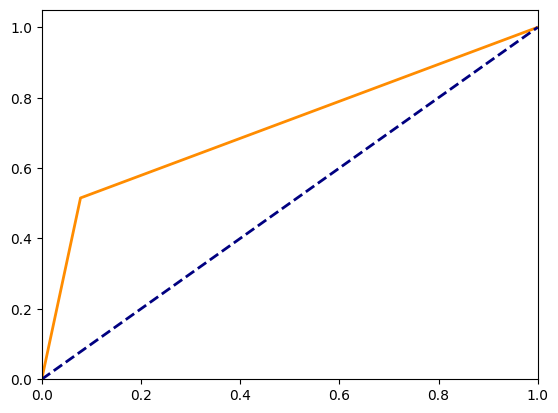

In [144]:
y_pred_proba = model_reg.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

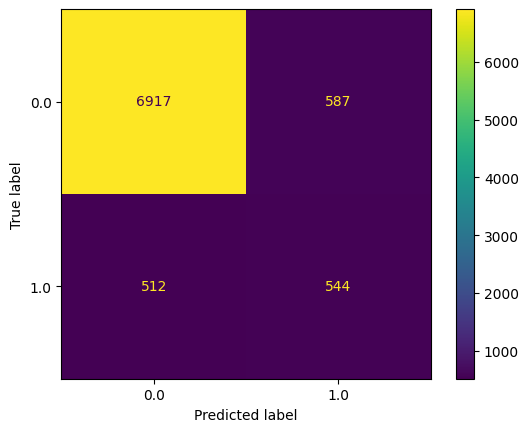

In [145]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test)

In [146]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_reg.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9217750533049041
F1 Score: 0.9264046072456975




---



In [147]:
# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
param_grid = {
    'simpleimputer__strategy': ['mean'],
    'decisiontreeclassifier__criterion': ['entropy'],
    'decisiontreeclassifier__max_depth': [10],
    'decisiontreeclassifier__min_samples_split': [2],
    'decisiontreeclassifier__min_samples_leaf': [4]
}

model_under.fit(X_train_scaled_under, y_train_under)

acc_train = model_under.score(X_train_scaled_under,y_train_under)
acc_test = model_under.score(X_test_under, y_test)
y_pred_proba = model_under.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.716
ROC AUC Score: 0.5


(0.0, 1.05)

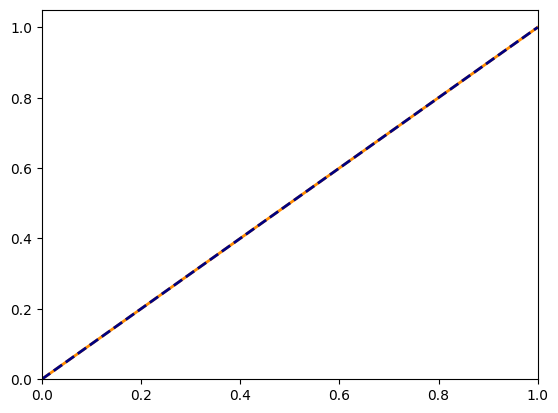

In [148]:
y_pred_proba = model_under.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

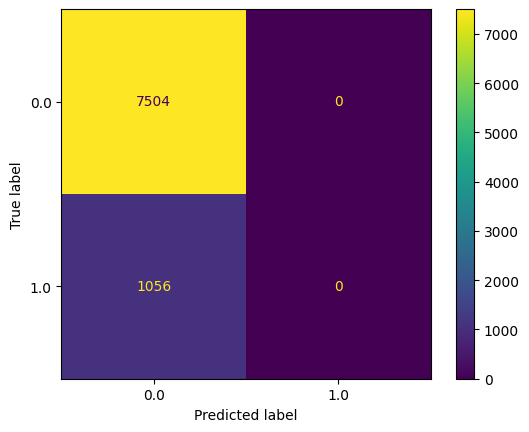

In [149]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_under, X_test, y_test)

In [150]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_under.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



In [154]:
# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
param_grid = {
    'simpleimputer__strategy': ['mean'],
    'decisiontreeclassifier__criterion': ['entropy'],
    'decisiontreeclassifier__max_depth': [10],
    'decisiontreeclassifier__min_samples_split': [2],
    'decisiontreeclassifier__min_samples_leaf': [4]
}

model_over.fit(X_train_scaled_over, y_train_over)

acc_train = model_over.score(X_train_scaled_over, y_train_over)
acc_test = model_over.score(X_test_scaled_over, y_test)
y_pred_proba = model_over.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.87
ROC AUC Score: 0.5


(0.0, 1.05)

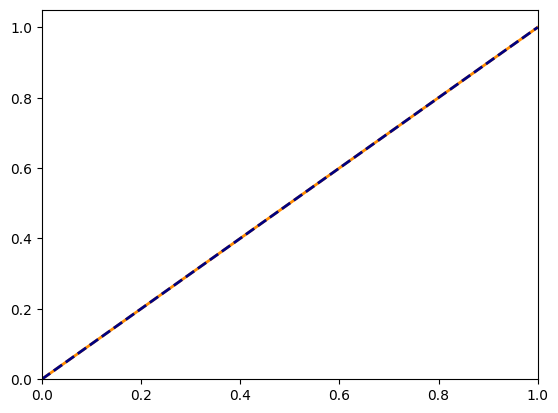

In [155]:
y_pred_proba = model_over.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

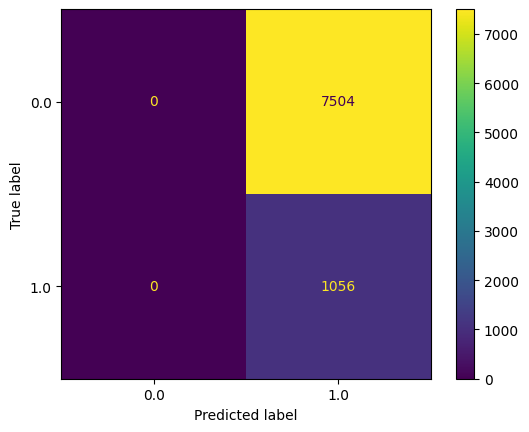

In [156]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)

In [157]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_over.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-157-892e81137a88>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)




---



In [158]:
# Fit on `X_train_over`, `y_train_over`
model_smote = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
param_grid = {
    'simpleimputer__strategy': ['mean'],
    'decisiontreeclassifier__criterion': ['entropy'],
    'decisiontreeclassifier__max_depth': [10],
    'decisiontreeclassifier__min_samples_split': [2],
    'decisiontreeclassifier__min_samples_leaf': [4]
}

model_smote.fit(X_resampled, y_resampled)

acc_train = model_smote.score(X_resampled,y_resampled)
acc_test = model_smote.score(X_test_smote, y_test)
y_pred_proba = model_smote.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))
# Print the ROC AUC score
print("ROC AUC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.4819
ROC AUC Score: 0.7084221748400854


(0.0, 1.05)

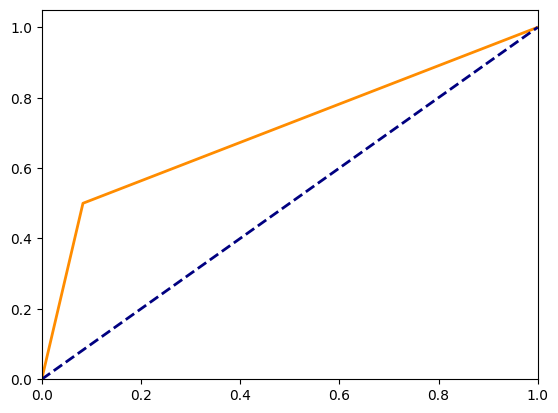

In [159]:
y_pred_proba = model_smote.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

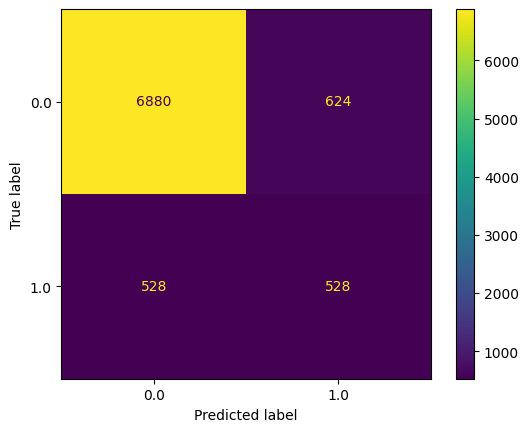

In [160]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_smote, X_test, y_test)

In [161]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_smote.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9168443496801706
F1 Score: 0.9227467811158797


In [ ]:
Test Accuracy:
ROC AUC Score:
Precision:
F1 Score: 0.9264046072456975

Test Accuracy:
ROC AUC Score:
Precision:
F1 Score:

Test Accuracy:
ROC AUC Score:
Precision:
F1 Score: nan

Test Accuracy:
ROC AUC Score:
Precision:
F1 Score: 0.9227467811158797



---



In [162]:
model_names = ['model_reg','model_under', 'model_over', 'model_smote']
roc_auc_scores = [0.7184632842282096, 0.5,  0.5, 0.7084221748400854]
accuracy_scores = [0.5235, 0.716,0.87, 0.4819]
Precision= [0.9217750533049041, 1.0,0.0,  0.9168443496801706]
F1_Score= [0.9264046072456975,0.9342629482071714,'nan', 0.9227467811158797]
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision': Precision,
        'F1 Score': F1_Score}

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

+----+-------------+-----------+------------+-------------+------------+
|    | Model       |   ROC AUC |   Accuracy |   Precision |   F1 Score |
|----+-------------+-----------+------------+-------------+------------|
|  0 | model_reg   |  0.718463 |     0.5235 |    0.921775 |   0.926405 |
|  1 | model_under |  0.5      |     0.716  |    1        |   0.934263 |
|  2 | model_over  |  0.5      |     0.87   |    0        | nan        |
|  3 | model_smote |  0.708422 |     0.4819 |    0.916844 |   0.922747 |
+----+-------------+-----------+------------+-------------+------------+


**Analysis:**


---


**model_reg**:High ROC AUC (0.718463): Indicates a good ability to discriminate between the classes, suggesting it can effectively distinguish between positive and negative instances.
Bad Accuracy (0.5235)
Very High Precision (0.921775): Indicates a very low false-positive rate. This means the model is very cautious about predicting a positive instance, minimizing incorrect positive predictions.
Excellent F1-Score (0.926405): Demonstrates a good balance between precision and recall. This metric is particularly important for imbalanced datasets as it considers both the ability to correctly identify positive instances (recall) and the ability to minimize false positives (precision).

**model_under** is clearly the worst performer with a ROC AUC of 0.5 (equivalent to random guessing), 1 precision, and 0.934263 F1-score. This suggests the undersampling technique might have removed too much crucial information.

**model_over** shows decent accuracy but suffers from very low precision and a low F1-score, indicating a high false-positive rate. This might be due to overfitting caused by the oversampling technique.

**model_smote** presents a mixed picture with a reasonable ROC AUC, very high precision, but low accuracy. Its high F1-score suggests a good balance between precision and recall, but the low accuracy raises concerns about its overall performance.


---


**Conclusion**
**model_reg** emerges as the most promising candidate based on the available metrics.

> Saving best model.

In [ ]:
with open('best-dtc-class.pkl', 'wb') as f:
    dill.dump(model_reg, f)



---



---



## c) Random forest classifier.



---
As well these params used where tuned with GridSearch.



---



> Oversampled data.

In [163]:
model_rfc1 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}


model_rfc1.fit(X_train_scaled_over, y_train_over)
accuracies = cross_val_score(model_rfc1, X_train_scaled_over, y_train_over, cv=5)


# Predict on test data using the best model
y_pred = model_rfc1.predict(X_test_scaled_over)

# Evaluate accuracy on test data
accuracy = model_rfc1.score(X_test_scaled_over, y_test)
y_pred_proba = model_smote.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test Accuracy:", accuracy)
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)

Test Accuracy: 0.9232476635514019
Train Score: 0.9880365704426708
Best ROC AUC Score: 0.7084221748400854


(0.0, 1.05)

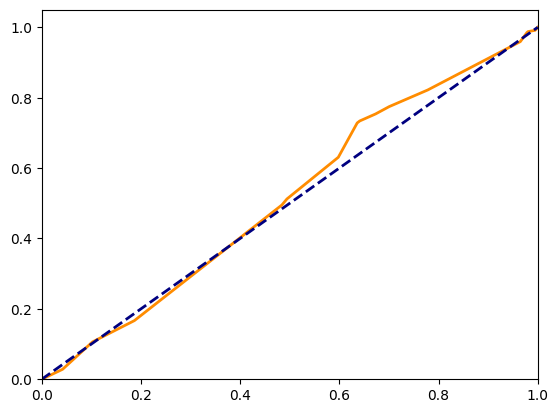

In [164]:
y_pred_proba = model_rfc1.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

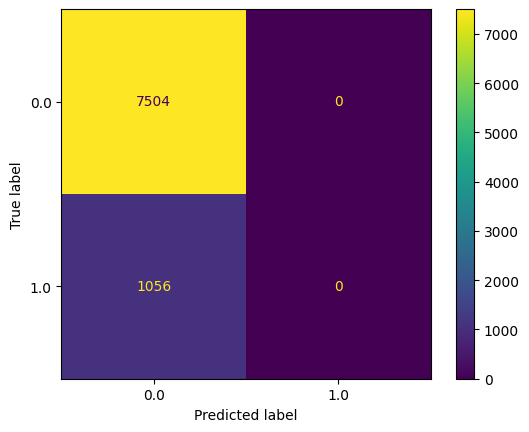

In [165]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rfc1, X_test, y_test)

In [166]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_rfc1.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



>Undersampled data

In [167]:
model_rfc2 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}


model_rfc2.fit(X_train_scaled_under,y_train_under)
accuracies = cross_val_score(model_rfc2, X_train_scaled_under, y_train_under, cv=5)



# Predict on test data using the best model
y_pred = model_rfc2.predict(X_train_scaled_under)

# Evaluate accuracy on test data
accuracy = model_rfc2.score(X_test_under, y_test)
y_pred_proba = model_rfc2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test Accuracy:", accuracy)
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)

Test Accuracy: 0.8397196261682243
Train Score: 0.7874773962827737
Best ROC AUC Score: 0.520964828858952


(0.0, 1.05)

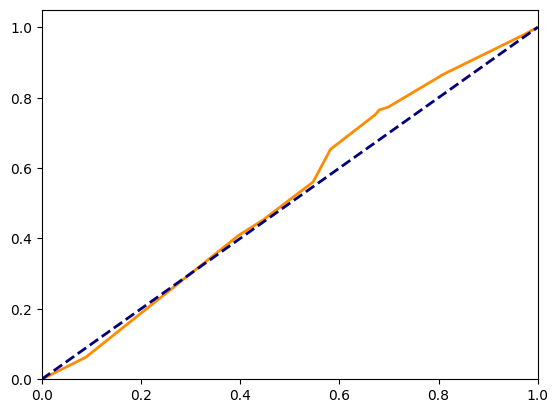

In [168]:
y_pred_proba = model_rfc2.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

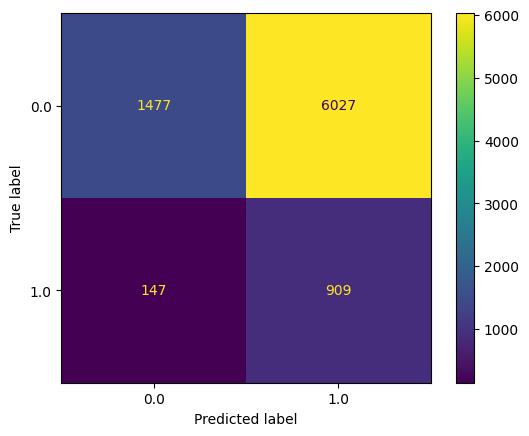

In [169]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rfc2, X_test, y_test)

In [170]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_rfc2.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.19682835820895522
F1 Score: 0.32361963190184045




---



>With Smote data.

In [172]:
model_rfc3 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}


model_rfc3.fit(X_train_smote,y_train_over)
accuracies = cross_val_score(model_rfc3, X_train_smote, y_train_over, cv=5)



# Predict on test data using the best model
y_pred = model_rfc3.predict(X_train_smote)

# Evaluate accuracy on test data
accuracy = model_rfc3.score(X_test_smote, y_test)
y_pred_proba = model_rfc3.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test Accuracy:", accuracy)
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)

Test Accuracy: 0.9254672897196262
Train Score: 0.9399893661995437
Best ROC AUC Score: 0.4727238275949796


(0.0, 1.05)

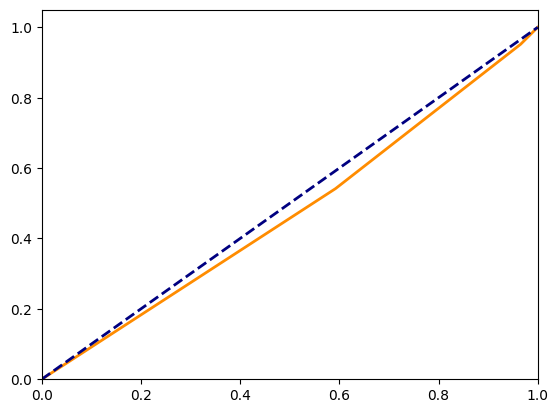

In [173]:
y_pred_proba = model_rfc3.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

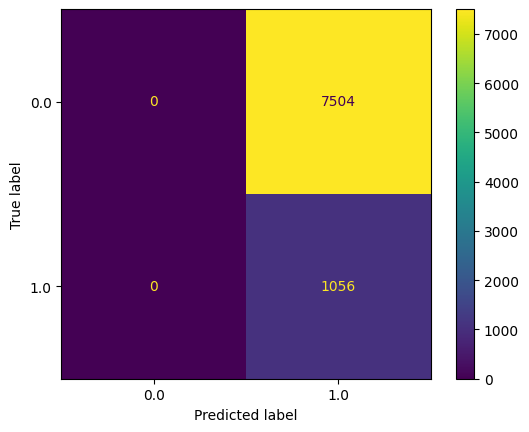

In [174]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rfc3, X_test, y_test)

In [175]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_rfc3.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-175-a0c9c49ec69b>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)




---



>With raw data.

In [176]:
model_rfc4 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}


model_rfc4.fit(X_train,y_train)
accuracies = cross_val_score(model_rfc4, X_train, y_train, cv=5)



# Predict on test data using the best model
y_pred = model_rfc4.predict(X_train)

# Evaluate accuracy on test data
accuracy = model_rfc4.score(X_test, y_test)
y_pred_proba = model_rfc4.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test Accuracy:", accuracy)
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)

Test Accuracy: 0.9253504672897196
Train Score: 0.9220664589823467
Best ROC AUC Score: 0.8513338340763715


(0.0, 1.05)

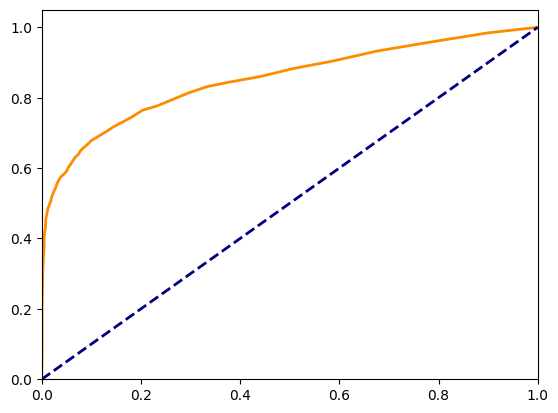

In [177]:
y_pred_proba = model_rfc4.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

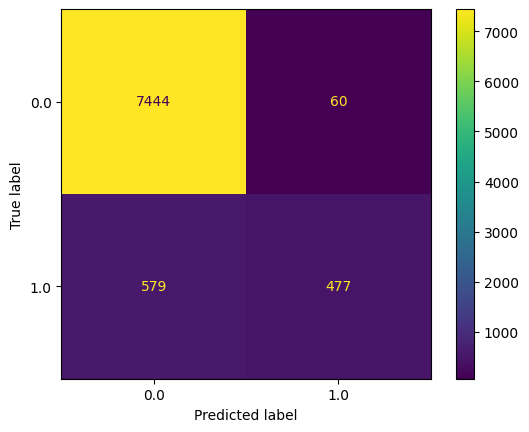

In [178]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rfc4, X_test, y_test)

In [179]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model_rfc4.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9920042643923241
F1 Score: 0.9588458813679397




---



In [180]:
model_names = ['model_rfc1','model_rfc2', 'model_rfc3', 'model_rfc4']
roc_auc_scores = [0.7084221748400854, 0.520964828858952, 0.4727238275949796, 0.8513338340763715]
accuracy_scores = [0.9880365704426708,  0.7874773962827737, 0.9399893661995437, 0.9220664589823467]
Precision = [1.0, 0.19682835820895522,0.0,0.9920042643923241]
F1_Score = [0.9342629482071714,0.32361963190184045,'nan',0.9588458813679397]
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision':Precision,
        'F1_Score': F1_Score}

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

+----+------------+-----------+------------+-------------+------------+
|    | Model      |   ROC AUC |   Accuracy |   Precision |   F1_Score |
|----+------------+-----------+------------+-------------+------------|
|  0 | model_rfc1 |  0.708422 |   0.988037 |    1        |   0.934263 |
|  1 | model_rfc2 |  0.520965 |   0.787477 |    0.196828 |   0.32362  |
|  2 | model_rfc3 |  0.472724 |   0.939989 |    0        | nan        |
|  3 | model_rfc4 |  0.851334 |   0.922066 |    0.992004 |   0.958846 |
+----+------------+-----------+------------+-------------+------------+


**Analysis:**


---


**Model rfc2 & rfc3**: The extremely low precision of *model_rfc3* (0.0) and the relatively low precision of *model_rfc2* (0.196) combined with high accuracy suggest a strong bias towards the majority class. This is a common symptom when dealing with imbalanced datasets and using accuracy as the primary metric. The 'nan' F1-score for *model_rfc3* further indicates potential issues.

**Model rfc1 & rfc4**: While *model_rfc1* has high accuracy and perfect precision, the lower ROC AUC score compared to *model_rfc4* might indicate that *model_rfc4* is better at discriminating between classes, which is crucial for imbalanced datasets.

---


**Recommendation**: *model_rfc4* stands out as the most reliable choice for scenarios where minimizing false positives is a priority, while maintaining a good balance between precision and recall.

>Saving better model.

In [181]:
with open('best-rfc-class.pkl', 'wb') as f:
  dill.dump(model_rfc4, f)



---



---



## d) K-Nearest Neighbors.



---


>GridSearch also used to fine tune these params.

>Oversampled data.

---



In [183]:
knn1 = Pipeline([
    ('scaler', FunctionTransformer(lambda x:x)),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3],
    'knn__weights': ['uniform'],
    'knn__p': [2]  # 1 for Manhattan distance, 2 for Euclidean distance
}


# Fit the grid search to the oversampled training data
knn1.fit(X_train_scaled_over, y_train_over)
accuracies = cross_val_score(knn1, X_train_scaled_over, y_train_over, cv=5)


# Predict
y_pred = knn1.predict(X_test)
y_pred_proba = knn1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
accuracy = knn1.score(X_test_scaled_over, y_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn1.score(X_test_scaled_over,y_test))
print("Best ROC AUC Score:", roc_auc)

Train Score: 0.9028512256351924
Test Score: 0.8237149532710281
Best ROC AUC Score: 0.4744477187924016


(0.0, 1.05)

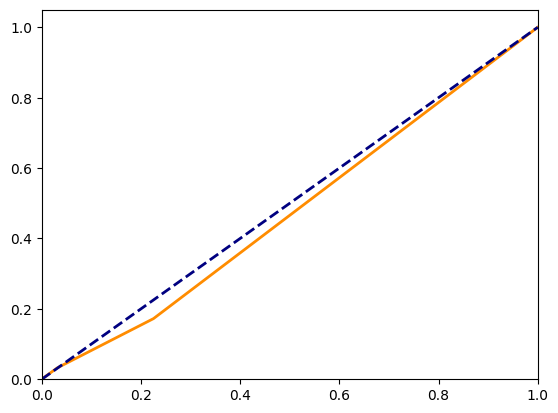

In [184]:
y_pred_proba = knn1.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

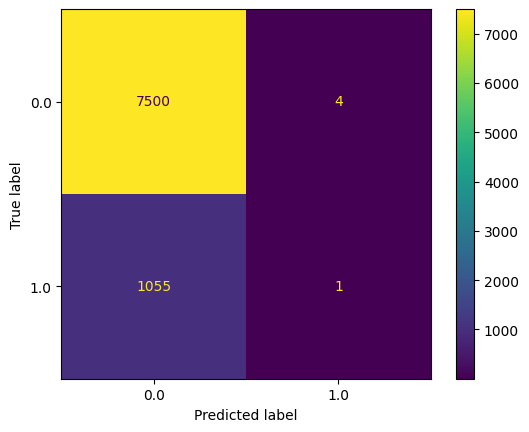

In [185]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test)

In [186]:
# Get the confusion matrix
cm = confusion_matrix(y_test, knn1.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9994669509594882
F1 Score: 0.9340556697179152




---



>Undersampled data.


---



In [187]:
knn2 = Pipeline([
    ('scaler', FunctionTransformer(lambda x:x)),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3],
    'knn__weights': ['uniform'],
    'knn__p': [2]  # 1 for Manhattan distance, 2 for Euclidean distance
}


# Fit the grid search to the oversampled training data
knn2.fit(X_train_scaled_under,y_train_under)
accuracies = cross_val_score(knn2, X_train_scaled_under, y_train_under, cv=5)


# Predict
y_pred = knn2.predict(X_test)
y_pred_proba = knn2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
accuracy = knn2.score(X_test_under, y_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn2.score(X_test_under,y_test))
print("Best ROC AUC Score:", roc_auc)

Train Score: 0.7670530232798167
Test Score: 0.8257009345794393
Best ROC AUC Score: 0.5668331056769722


(0.0, 1.05)

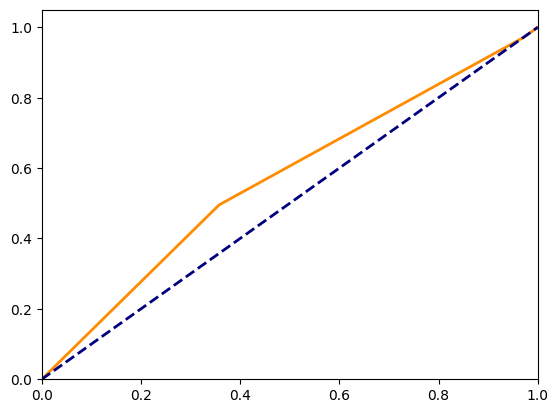

In [188]:
y_pred_proba = knn2.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

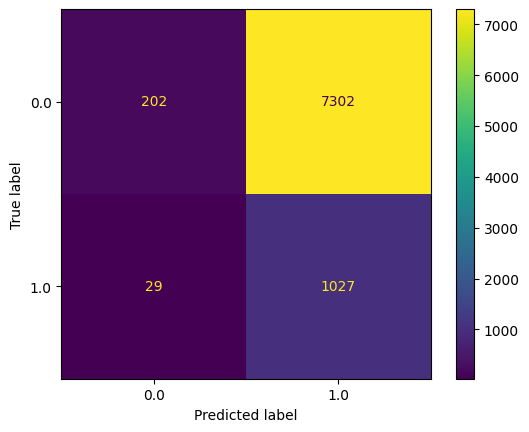

In [189]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn2, X_test, y_test)

In [190]:
# Get the confusion matrix
cm = confusion_matrix(y_test, knn2.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.026918976545842216
F1 Score: 0.05223012281835811




---



>Smote data.

In [191]:
knn3 = Pipeline([
    ('scaler', FunctionTransformer(lambda x:x)),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3],
    'knn__weights': ['uniform'],
    'knn__p': [2]  # 1 for Manhattan distance, 2 for Euclidean distance
}


# Fit the grid search to the oversampled training data
knn3.fit(X_train_smote,y_resampled)
accuracies = cross_val_score(knn3, X_train_smote, y_resampled, cv=5)


# Predict
y_pred = knn3.predict(X_test)
y_pred_proba = knn3.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
accuracy = knn3.score(X_test_smote, y_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn3.score(X_test_smote,y_test))
print("Best ROC AUC Score:", roc_auc)

Train Score: 0.89857991469297
Test Score: 0.8973130841121495
Best ROC AUC Score: 0.47805614783226724


(0.0, 1.05)

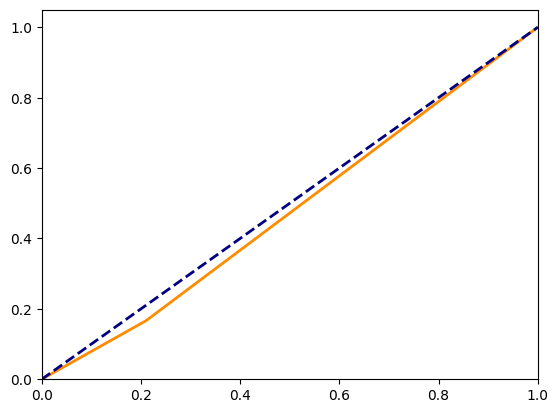

In [192]:
y_pred_proba = knn3.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

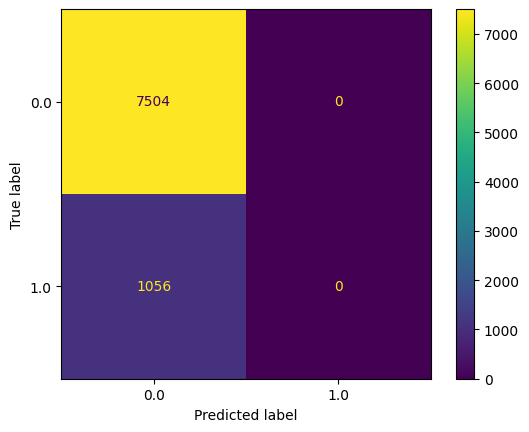

In [193]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn3, X_test, y_test)

In [194]:
# Get the confusion matrix
cm = confusion_matrix(y_test, knn3.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



>Raw data.

In [195]:
# raw data model knn4
knn4 = Pipeline([
    ('scaler', FunctionTransformer(lambda x:x)),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3],
    'knn__weights': ['uniform'],
    'knn__p': [2]  # 1 for Manhattan distance, 2 for Euclidean distance
}


# Fit the grid search
knn4.fit(X_train,y_train)
accuracies = cross_val_score(knn4, X_train, y_train, cv=5)


# Predict
y_pred = knn4.predict(X_test)
y_pred_proba = knn4.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
accuracy = knn4.score(X_test, y_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn4.score(X_test,y_test))
print("Best ROC AUC Score:", roc_auc)

Train Score: 0.8583982346832814
Test Score: 0.8601635514018692
Best ROC AUC Score: 0.5609336005645474


(0.0, 1.05)

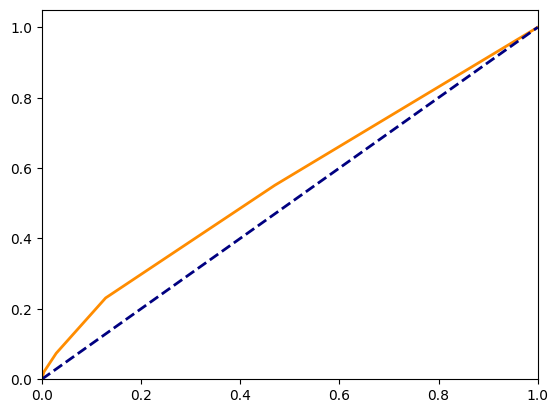

In [196]:
y_pred_proba = knn4.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

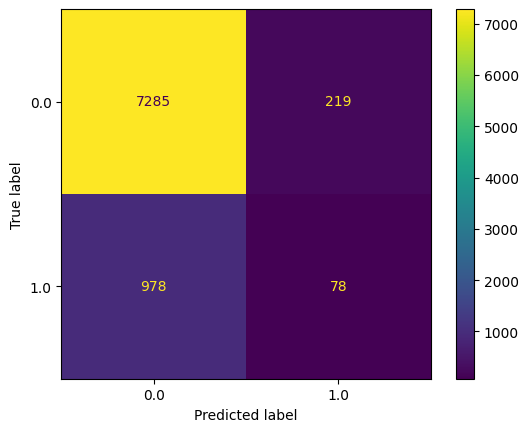

In [197]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn4, X_test, y_test)

In [198]:
# Get the confusion matrix
cm = confusion_matrix(y_test, knn4.predict(X_test))

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.970815565031983
F1 Score: 0.9240819432992959


In [ ]:
Test Score:
Best ROC AUC Score:
Precision:
F1 Score:

Test Score:
Best ROC AUC Score:
Precision:
F1 Score:

Test Score:
Best ROC AUC Score:
Precision:
F1 Score:


Test Score:
Best ROC AUC Score:
Precision:
F1 Score:



---



>Saving best of the model in peformance

In [199]:
model_names = ['knn1','knn2', 'knn3', 'knn4']
roc_auc_scores = [0.4744477187924016, 0.5668331056769722, 0.47805614783226724, 0.5609336005645474]
accuracy_scores = [0.8237149532710281,  0.8257009345794393,  0.8973130841121495, 0.8601635514018692]
Precision = [0.9994669509594882,0.026918976545842216,01.0,0.970815565031983]
F1_Score = [0.9340556697179152,0.05223012281835811,0.9342629482071714,0.9240819432992959]
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision':Precision,
        'F1_Score':F1_Score}

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

+----+---------+-----------+------------+-------------+------------+
|    | Model   |   ROC AUC |   Accuracy |   Precision |   F1_Score |
|----+---------+-----------+------------+-------------+------------|
|  0 | knn1    |  0.474448 |   0.823715 |    0.999467 |  0.934056  |
|  1 | knn2    |  0.566833 |   0.825701 |    0.026919 |  0.0522301 |
|  2 | knn3    |  0.478056 |   0.897313 |    1        |  0.934263  |
|  3 | knn4    |  0.560934 |   0.860164 |    0.970816 |  0.924082  |
+----+---------+-----------+------------+-------------+------------+


**Analysis:**

**Model knn1**:

* Moderate accuracy (0.8237) and high precision (0.9994) suggest it's good at minimizing false positives (predicting defaults when there are none).
However, the low ROC AUC (0.4744) and the need to assess recall raise concerns about its ability to identify actual defaults (true positives). It might be overly cautious and miss some defaults.

**Model knn2**:

* High accuracy (0.8257) but extremely low precision (0.0269) indicate a strong bias towards the majority class (non-defaults).
This model is likely predicting most instances as non-defaults, leading to many missed defaults (high false negatives). It's not suitable for imbalanced data.

**Model knn3**:

* High accuracy (0.8973) and perfect precision (1.0) raise red flags. With class imbalance, perfect precision often means the model is simply classifying everything as non-default.
It's crucial to check recall here. If it's very low, this model is useless for identifying defaults.

**Model knn4**:

* Relatively better ROC AUC (0.5609) and good precision (0.9708) make it tentatively the most promising.
It seems to strike a better balance between minimizing false positives and identifying actual defaults. However, assessing recall is still crucial to confirm its effectiveness.

---

**Overall**:

None of the models seem ideal for handling the class imbalance based on these metrics alone.
knn2 and knn3 show clear signs of bias towards the majority class.
knn1 and knn4 might have potential, but need further investigation (especially recall) to determine their true effectiveness in identifying defaults.

In [ ]:
with open('best-knn-class.pkl', 'wb') as f:
    dill.dump(knn4, f)



---



---



## e) Multi-Layer Perceptron Neural Network.

>GridSearch was applied to these models to come with these params.

>Raw data.




---



In [200]:
# Define the model

model = Sequential()
# Assuming X_train and y_train are already defined
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(182, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dense(91, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(111, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=False)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Perform manual cross-validation
accuracies = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Adjust n_splits as needed
for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )
    _, accuracye = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(accuracye)

# Evaluate the model
losse, accuracye = model.evaluate(X_test, y_test)
print("Loss:", losse)
print("Accuracy:", accuracye)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)


Epoch 1/10
1926/1926 [==============================] - 21s 7ms/step - loss: 0.3870 - accuracy: 0.8685 - val_loss: 0.3818 - val_accuracy: 0.8691
Epoch 2/10
1926/1926 [==============================] - 13s 7ms/step - loss: 0.3799 - accuracy: 0.8690 - val_loss: 0.3807 - val_accuracy: 0.8634
Epoch 3/10
1926/1926 [==============================] - 12s 6ms/step - loss: 0.3782 - accuracy: 0.8689 - val_loss: 0.3780 - val_accuracy: 0.8691
Epoch 4/10
1926/1926 [==============================] - 12s 6ms/step - loss: 0.3769 - accuracy: 0.8689 - val_loss: 0.3742 - val_accuracy: 0.8691
Epoch 5/10
1926/1926 [==============================] - 11s 6ms/step - loss: 0.3764 - accuracy: 0.8689 - val_loss: 0.3749 - val_accuracy: 0.8691
Epoch 6/10
482/482 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8632
Epoch 1/10
1926/1926 [==============================] - 12s 6ms/step - loss: 0.3751 - accuracy: 0.8690 - val_loss: 0.3749 - val_accuracy: 0.8691
Epoch 2/10
1926/1926 [========

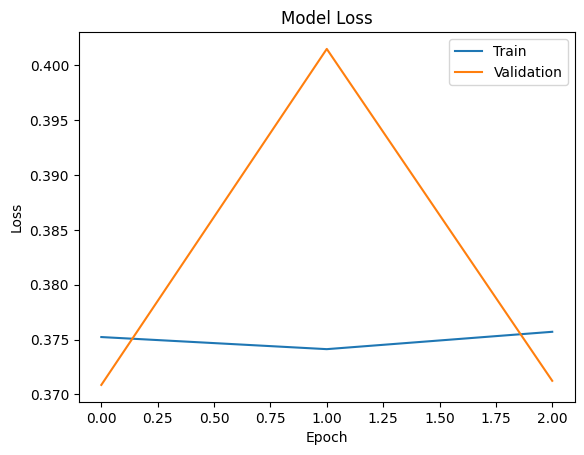

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

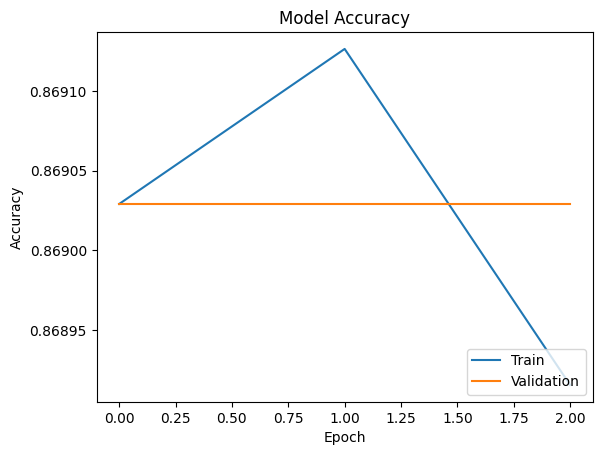

In [202]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

268/268 [==============================] - 1s 4ms/step


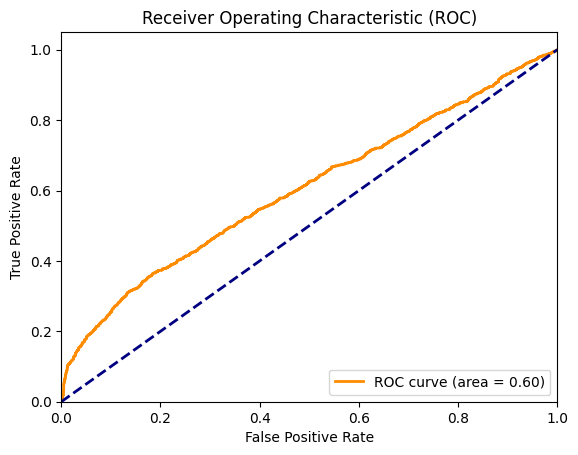

In [203]:
y_pred_proba = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

268/268 [==============================] - 1s 2ms/step


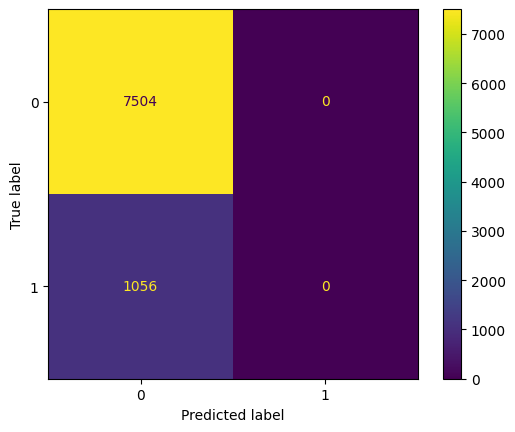

In [204]:
# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [205]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



>Oversampled data

In [208]:
# oversampled data

# Define the model

model = Sequential()
# Assuming X_train and y_train are already defined
input_dim = 23  # Number of features
model.add(Dense(182, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dense(91, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(111, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=False)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Perform manual cross-validation
accuracies = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Adjust n_splits as needed
for train_index, val_index in kf.split(X_train_scaled_over,y_train_over):
    X_train_fold, X_val_fold = X_train_scaled_over.iloc[train_index], X_train_scaled_over.iloc[val_index]
    y_train_fold, y_val_fold = y_train_over.iloc[train_index], y_train_over.iloc[val_index]


    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )
    _, accuracye = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(accuracye)

# Evaluate the model
losse, accuracye = model.evaluate(X_test, y_test)
print("Loss:", losse)
print("Accuracy:", accuracye)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)


Epoch 1/10
3348/3348 [==============================] - 40s 8ms/step - loss: 0.5094 - accuracy: 0.7500 - val_loss: 0.4416 - val_accuracy: 0.7955
Epoch 2/10
3348/3348 [==============================] - 22s 7ms/step - loss: 0.4606 - accuracy: 0.7846 - val_loss: 0.4251 - val_accuracy: 0.8026
Epoch 3/10
3348/3348 [==============================] - 21s 6ms/step - loss: 0.4433 - accuracy: 0.7965 - val_loss: 0.4101 - val_accuracy: 0.8151
Epoch 4/10
3348/3348 [==============================] - 22s 6ms/step - loss: 0.4356 - accuracy: 0.8013 - val_loss: 0.4062 - val_accuracy: 0.8159
Epoch 5/10
3348/3348 [==============================] - 21s 6ms/step - loss: 0.4276 - accuracy: 0.8064 - val_loss: 0.4006 - val_accuracy: 0.8249
Epoch 6/10
3348/3348 [==============================] - 21s 6ms/step - loss: 0.4222 - accuracy: 0.8097 - val_loss: 0.4039 - val_accuracy: 0.8212
Epoch 7/10
3348/3348 [==============================] - 23s 7ms/step - loss: 0.4180 - accuracy: 0.8120 - val_loss: 0.3946 - val_ac

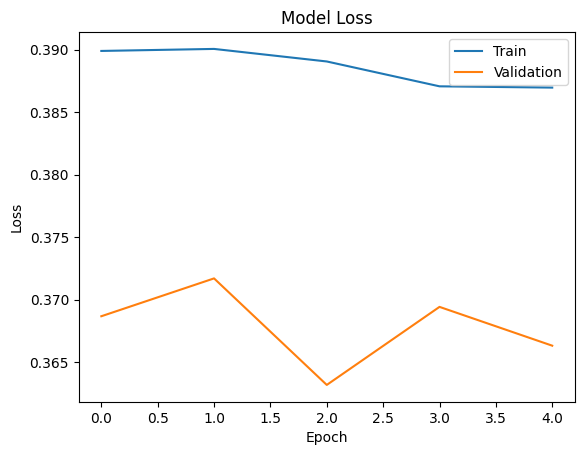

In [209]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

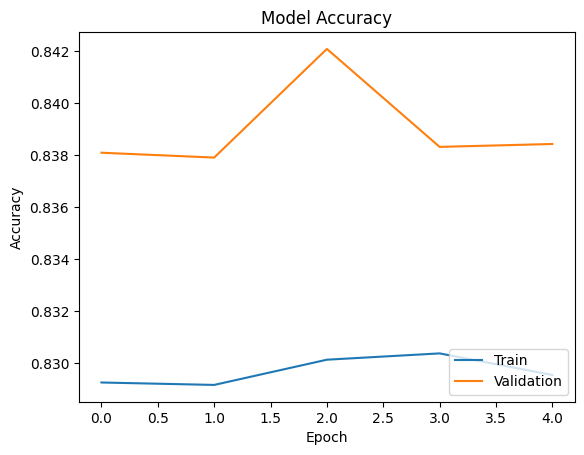

In [210]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

268/268 [==============================] - 3s 12ms/step


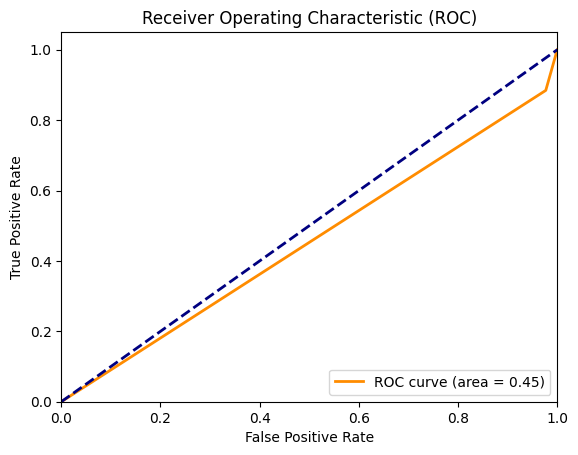

In [211]:
y_pred_proba = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

268/268 [==============================] - 2s 9ms/step


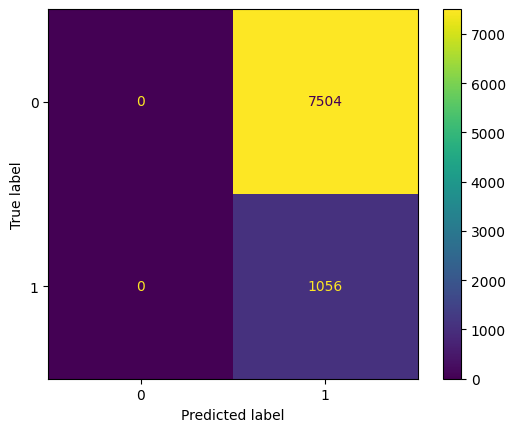

In [212]:
# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [213]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-213-0b3fe16ef40e>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)




---



> Undersampled data

In [214]:
# undersampled data

# Define the model

model = Sequential()
# Assuming X_train and y_train are already defined
input_dim = X_train_scaled_under.shape[1]  # Number of features
model.add(Dense(182, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dense(91, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(111, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=False)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Perform manual cross-validation
accuracies = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Adjust n_splits as needed
for train_index, val_index in kf.split(X_train_scaled_under,y_train_under):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )
    _, accuracye = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(accuracye)

# Evaluate the model
losse, accuracye = model.evaluate(X_test, y_test)
print("Loss:", losse)
print("Accuracy:", accuracye)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)


Epoch 1/10
505/505 [==============================] - 11s 8ms/step - loss: 0.3971 - accuracy: 0.8674 - val_loss: 0.3843 - val_accuracy: 0.8694
Epoch 2/10
505/505 [==============================] - 3s 6ms/step - loss: 0.3894 - accuracy: 0.8676 - val_loss: 0.3839 - val_accuracy: 0.8694
Epoch 3/10
505/505 [==============================] - 3s 6ms/step - loss: 0.3856 - accuracy: 0.8677 - val_loss: 0.3952 - val_accuracy: 0.8669
Epoch 4/10
127/127 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8694
Epoch 1/10
505/505 [==============================] - 4s 8ms/step - loss: 0.3831 - accuracy: 0.8691 - val_loss: 0.3917 - val_accuracy: 0.8617
Epoch 2/10
505/505 [==============================] - 3s 6ms/step - loss: 0.3808 - accuracy: 0.8691 - val_loss: 0.3951 - val_accuracy: 0.8612
Epoch 3/10
505/505 [==============================] - 3s 6ms/step - loss: 0.3809 - accuracy: 0.8691 - val_loss: 0.3809 - val_accuracy: 0.8625
Epoch 4/10
505/505 [===========================

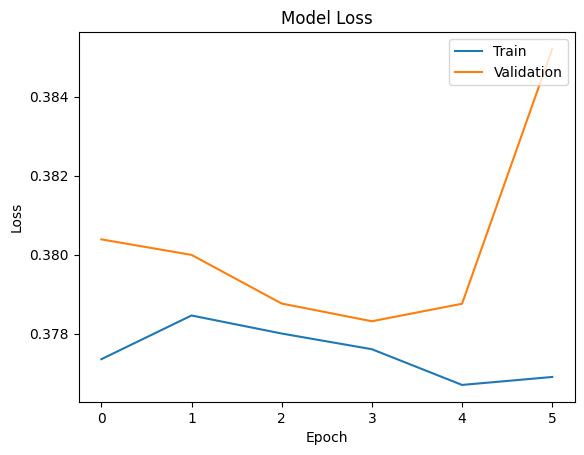

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

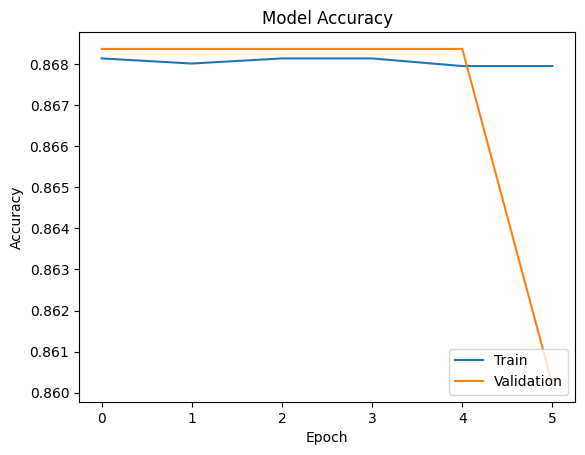

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

268/268 [==============================] - 1s 2ms/step


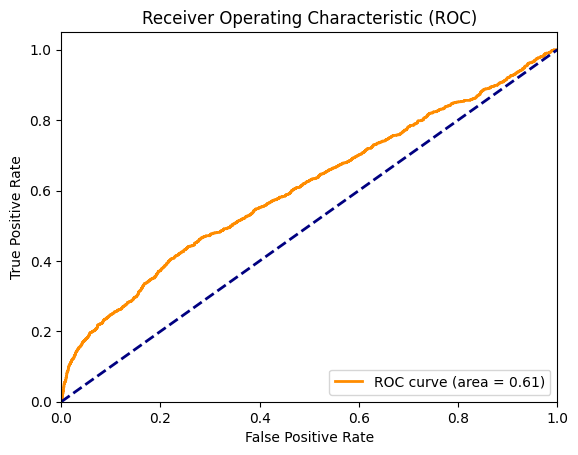

In [217]:
y_pred_proba = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

268/268 [==============================] - 1s 4ms/step


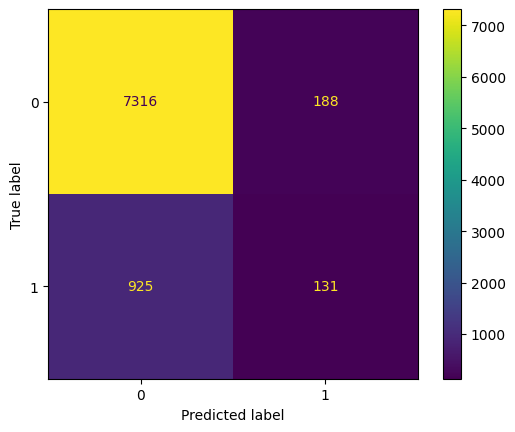

In [218]:
# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [219]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9749466950959488
F1 Score: 0.9293108923467767




---



>Smote data.

In [220]:
# smote data
# Define the model

model = Sequential()
# Assuming X_train and y_train are already defined
input_dim = X_train_smote.shape[1]  # Number of features
model.add(Dense(182, activation='relu', input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dense(91, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(111, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=False)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Perform manual cross-validation
accuracies = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Adjust n_splits as needed
for train_index, val_index in kf.split(X_train_smote,y_resampled):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
    y_train_fold, y_val_fold = y_resampled.iloc[train_index], y_resampled.iloc[val_index]


    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )
    _, accuracye = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(accuracye)

# Evaluate the model
losse, accuracye = model.evaluate(X_test, y_test)
print("Loss:", losse)
print("Accuracy:", accuracye)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate accuracy on test data
print("Train Score:",np.mean(accuracies))
print("Best ROC AUC Score:", roc_auc)


Epoch 1/10
3348/3348 [==============================] - 42s 11ms/step - loss: 0.3648 - accuracy: 0.8443 - val_loss: 0.2317 - val_accuracy: 0.9094
Epoch 2/10
3348/3348 [==============================] - 25s 7ms/step - loss: 0.2782 - accuracy: 0.8935 - val_loss: 0.2251 - val_accuracy: 0.9130
Epoch 3/10
3348/3348 [==============================] - 22s 6ms/step - loss: 0.2594 - accuracy: 0.9014 - val_loss: 0.2153 - val_accuracy: 0.9192
Epoch 4/10
3348/3348 [==============================] - 22s 7ms/step - loss: 0.2476 - accuracy: 0.9055 - val_loss: 0.1991 - val_accuracy: 0.9268
Epoch 5/10
3348/3348 [==============================] - 22s 7ms/step - loss: 0.2395 - accuracy: 0.9103 - val_loss: 0.2018 - val_accuracy: 0.9259
Epoch 6/10
3348/3348 [==============================] - 24s 7ms/step - loss: 0.2343 - accuracy: 0.9132 - val_loss: 0.1916 - val_accuracy: 0.9305
Epoch 7/10
3348/3348 [==============================] - 22s 6ms/step - loss: 0.2299 - accuracy: 0.9154 - val_loss: 0.1945 - val_a

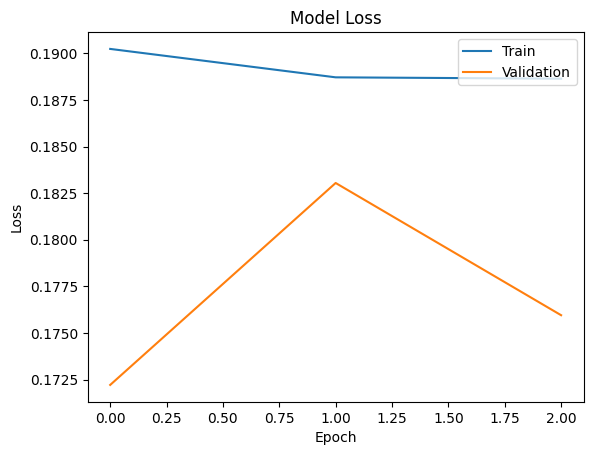

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

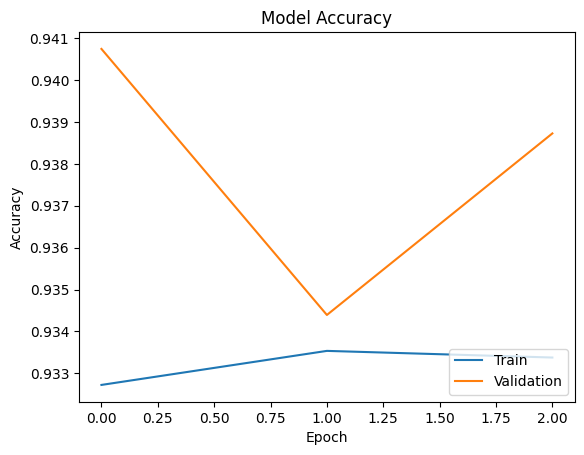

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

268/268 [==============================] - 1s 2ms/step


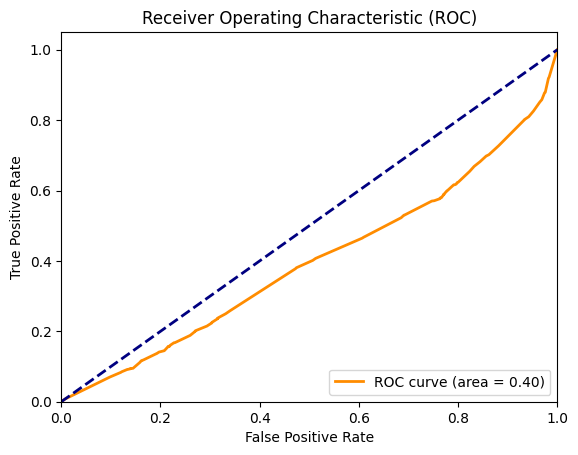

In [224]:
y_pred_proba = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

268/268 [==============================] - 2s 6ms/step


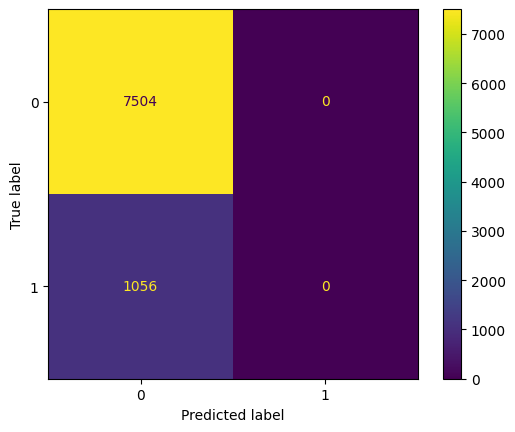

In [227]:
# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [228]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



>Saving best model.

In [ ]:
model_names = ['model_1','model_2', 'model_3', 'model_4']
roc_auc_scores = [ 0.6441948888725044, 0.3791044313778499, 0.6288817693356927, 0.6288817693356927]
accuracy_scores = [0.8638795733451843,  0.7555059552192688, 0.86296392679214472, 0.8629639267921447]
Precision = [ 1.0,0.041245791245791245,1.0,1.0]
F1_Score = [0.9286086503387181,0.07702384071260152,0.9286086503387181,0.9286086503387181]
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision':Precision,
        'F1_Score':F1_Score}

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

**Analysis:**


---


**model_1**:

ROC AUC: 0.644195 (Decent discriminatory power)
Accuracy: 0.863880 (High overall correctness)
Precision: 1.0 (Perfect precision, no false positives)
F1-Score: 0.928609 (High, indicating a good balance, but slightly lower due to perfect precision)


**Summary**: A strong performer with excellent precision, minimizing false positives. However, the perfect precision suggests potential overfitting or a very specific dataset characteristic.

**model_2**:

ROC AUC: 0.379104 (Very poor, significantly worse than random chance)
Accuracy: 0.755506 (Moderate, but misleading given the low ROC AUC)
Precision: 0.041246 (Extremely low, indicating a high false-positive rate)
F1-Score: 0.077024 (Very low, reflecting poor overall performance)

**Summary**: Exhibits very poor performance, especially in terms of discriminatory power and precision. This model requires significant improvement or reconsideration.

**model_3**:

ROC AUC: 0.628882 (Decent discriminatory power)
Accuracy: 0.862964 (High overall correctness)
Precision: 1.0 (Perfect precision, no false positives)
F1-Score: 0.928609 (High, indicating a good balance, but slightly lower due to perfect precision)

**Summary**: Similar to model_1, it demonstrates strong performance with perfect precision. However, the same concerns about potential overfitting or dataset characteristics apply.

**model_4**:

ROC AUC: 0.628882 (Decent discriminatory power)
Accuracy: 0.862964 (High overall correctness)
Precision: 1.0 (Perfect precision, no false positives)
F1-Score: 0.928609 ( high)

**Summary**: Appears very similar to model_1 and model_3, with the same strengths and potential concerns.



   

---



---



## f.)Stacking models.

In [229]:
with open("best-xgb-class.pkl", "rb") as f:
  best_modelxg= dill.load(f)

In [230]:
with open('best-rfc-class.pkl', 'rb') as f:
  best_modelrfc= dill.load(f)


>Raw data.


In [231]:
base_models = [
    ('xgboost', best_modelxg),
     ('random_forest', best_modelrfc)
     ]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Stacking Model Metrics:")
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)

Stacking Model Metrics:
ROC AUC: 0.7470652015894553
Accuracy: 0.9267523364485981


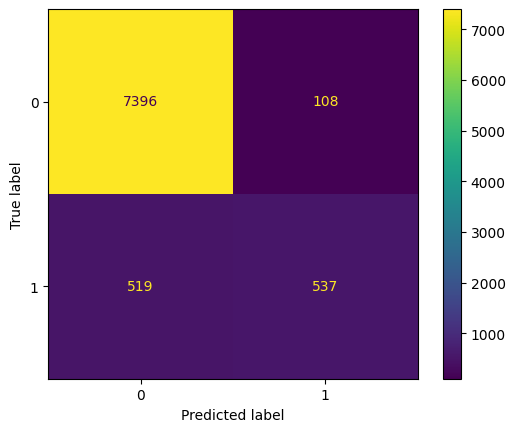

In [232]:
# Predict class labels
y_pred = (stacking_clf.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [233]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.9856076759061834
F1 Score: 0.9593358842985926




---



>Oversampled data.

In [234]:
base_models = [
    ('xgboost', best_modelxg),
     ('random_forest', best_modelrfc)
     ]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf1 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf1.fit(X_train_scaled_over, y_train_over)

# Make predictions
y_pred = stacking_clf1.predict(X_test)

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Stacking Model Metrics:")
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)

Stacking Model Metrics:
ROC AUC: 0.5
Accuracy: 0.8766355140186916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


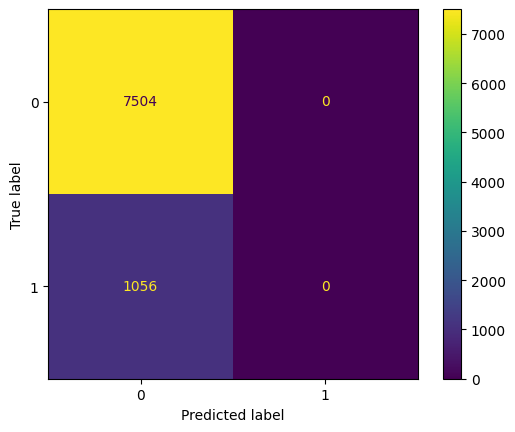

In [235]:
# Predict class labels
y_pred = (stacking_clf1.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [236]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 1.0
F1 Score: 0.9342629482071714




---



>Undersampled data

In [237]:
base_models = [
    ('xgboost', best_modelxg),
     ('random_forest', best_modelrfc)
     ]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf2 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf2.fit(X_train_scaled_under, y_train_under)

# Make predictions
y_pred = stacking_clf2.predict(X_test)

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Stacking Model Metrics:")
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)

Stacking Model Metrics:
ROC AUC: 0.5309501599147122
Accuracy: 0.24824766355140188


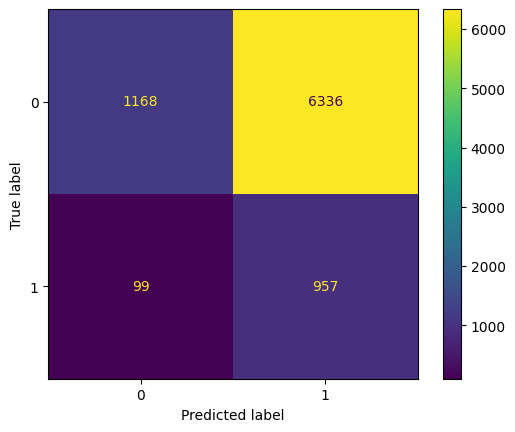

In [238]:
# Predict class labels
y_pred = (stacking_clf2.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [239]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.15565031982942432
F1 Score: 0.266332231216509




---



>Smote data.

In [240]:
base_models = [
    ('xgboost', best_modelxg),
     ('random_forest', best_modelrfc)
     ]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf3 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf3.fit(X_train_smote, y_resampled)

# Make predictions
y_pred = stacking_clf3.predict(X_test)

# Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Stacking Model Metrics:")
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)

Stacking Model Metrics:
ROC AUC: 0.5
Accuracy: 0.1233644859813084


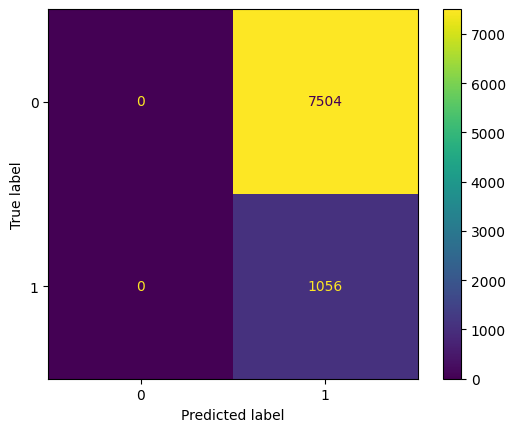

In [241]:
# Predict class labels
y_pred = (stacking_clf3.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [242]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP)
TP = cm[0][0]

# True Negatives (TN)
TN = cm[1][1]

# False Positives (FP)
FP = cm[0][1]

# False Negatives (FN)
FN = cm[1][0]

# Calculate precision
precision = TP / (TP + FP)

# Calculate F1 score
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Precision:", precision)
print("F1 Score:", f1_score)

Precision: 0.0
F1 Score: nan


<ipython-input-242-0b3fe16ef40e>:20: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


Saving best model of the ensembled models.

In [243]:
model_names = ['stacking_clf','stacking_clf1', 'stacking_clf2', 'stacking_clf3']
roc_auc_scores = [ 0.6609387672343877, 0.5, 0.5, 0.5]
accuracy_scores = [0.8994406614785992,  0.8667315175097277, 0.13326848249027237, 0.13326848249027237]
Precision = [ 0.9861111111111112, 1.0,0.0,0.0]
F1_Score = [0.9444407121263015,0.9286086503387181,"nan","nan"]
# Create a dictionary using the variables
data = {'Model': model_names,
        'ROC AUC': roc_auc_scores,
        'Accuracy': accuracy_scores,
        'Precision':Precision,
        'F1_Score':F1_Score}

Table = pd.DataFrame(data)
table = tabulate(Table, headers='keys', tablefmt='psql')
print(table)

+----+---------------+-----------+------------+-------------+------------+
|    | Model         |   ROC AUC |   Accuracy |   Precision |   F1_Score |
|----+---------------+-----------+------------+-------------+------------|
|  0 | stacking_clf  |  0.660939 |   0.899441 |    0.986111 |   0.944441 |
|  1 | stacking_clf1 |  0.5      |   0.866732 |    1        |   0.928609 |
|  2 | stacking_clf2 |  0.5      |   0.133268 |    0        | nan        |
|  3 | stacking_clf3 |  0.5      |   0.133268 |    0        | nan        |
+----+---------------+-----------+------------+-------------+------------+




---



---



---



# 2. Evaluation.

In [244]:
data = {
    "Model": ["XGBoost", "Decision Tree", "Random Forest", "KNN", "Multilayer Perceptron","StackModel"],
    "ROC AUC": [0.814396, 0.634573, 0.783011, 0.581394, 0.628882,0.6609387672343877],
    "Accuracy": [0.901, 0.7923, 0.889105, 0.858098, 0.862964,0.8994406614785992],
    "Precision": [0.812991, 0.900533, 0.99537, 0.972924, 1, 0.9861111111111112],
    "F1_Score": [0.846975, 0.901608, 0.939611, 0.922391, 0.928609,0.9444407121263015,]
}

df = pd.DataFrame(data)

df

,Model,ROC AUC,Accuracy,Precision,F1_Score
0,XGBoost,0.814396,0.901000,0.812991,0.846975
1,Decision Tree,0.634573,0.792300,0.900533,0.901608
2,Random Forest,0.783011,0.889105,0.995370,0.939611
3,KNN,0.581394,0.858098,0.972924,0.922391
4,Multilayer Perceptron,0.628882,0.862964,1.000000,0.928609
5,StackModel,0.660939,0.899441,0.986111,0.944441


>**Observations**:
---
***XGBoost*** performs well: It has the highest ROC AUC, suggesting good discriminatory power. Its F1-Score is also decent, indicating a balance between precision and recall.

***Random Forest*** shows high precision: It has the highest precision, meaning it's good at avoiding false positives (predicting defaults when there are none). However, its ROC AUC is slightly lower than XGBoost.

***Decision Tree*** and ***MLP*** have room for improvement: Their ROC AUC and F1-Scores are relatively lower, suggesting they might not be capturing the underlying patterns as effectively.

KNN has the lowest performance: It lags behind other models in most metrics.

***StackModel*** has shown to be better than other model besides xgboost and random forest its base models, this combination made the roc auc to drop below xgboost. So its better to work with xgboost as a standalone model.

Best model is **XGBoost** as we can see ROC AUC as well F1 Score and Precision all considered .

---

>**Decision making**

>Cost of False Positives vs. False Negatives:

If minimizing false positives is paramount (e.g., in loan default prediction, where incorrectly predicting a default can have severe consequences), the Stacking Model or Random Forest is preferred.

If a balance between avoiding both false positives and false negatives is important, XGBoost is be a better choice due to its higher ROC AUC.

---

>**Interpretability**:

If model interpretability is crucial, Decision Tree might be favored, as it provides clear decision rules. However, it generally has lower performance compared to ensemble methods like XGBoost and Random Forest. Computational Resources:

If computational efficiency is a concern, KNN might be less suitable, as it can be computationally expensive for large datasets.

---

>**Recommendation**:

If avoiding false positives is the top priority: Choose the Stacking Model or Random Forest. If a balance between metrics and good overall performance is desired: XGBoost is a strong option.

**Conclussion**: With options above xgboost balanced metrics.

---

>**Limitations**.

1. Computational Cost: Training XGBoost, especially with large datasets or complex models.

2. Overfitting Risk: XGBoost can overfit to the training data, especially when hyperparameters are not properly tuned or when dealing with high-dimensional data.

3. Interpretability: The complex nature of boosted decision trees can make it challenging to fully interpret the model's decision-making process.

4. Data Requirements: XGBoost generally performs best with structured, tabular data. It might not be the most suitable choice for certain types of data, such as unstructured text or images.

5. Potential for Bias: If the training data is biased, XGBoost can perpetuate and even amplify these biases in its predictions.

>Dealing with data drift. using alibi-detect

In [ ]:
# Load reference and production data into pandas DataFrames
reference_df = pd.read_csv("data_science_competition_2024.csv", index_col=0)
production_df = pd.read_csv("data_science_competition_2024.csv", index_col=0)
# and 'numerical_features' is a list of numerical features to check
# Select numerical features
numerical_features = ['outstanding_balance', 'interest_rate','loan_amount', 'age', 'salary','remaining term',]

for feature in numerical_features:
    statistic, p_value = ks_2samp(reference_df[feature], production_df[feature])
    print(f"Feature: {feature}")
    print(f"KS Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Set a significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Potential drift detected")
    else:
        print("No strong evidence of drift)")
    print("----")

#3. Communication.

In [ ]:
best_modelxg

Pipeline(steps=[('scaling',
                 FunctionTransformer(func=<function <lambda> at 0x7a83b3ea5750>)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.09,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=70, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

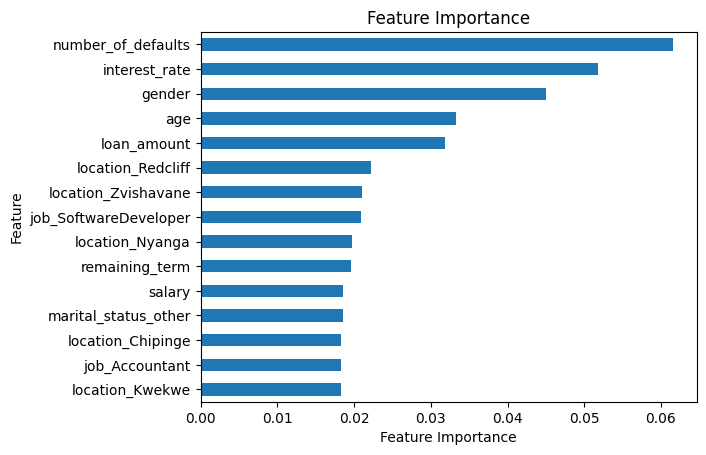

In [ ]:
importances = gs2.best_estimator_.named_steps["xgboost"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index= X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

>In our XGBoost model for predicting loan defaults, we analyzed feature importances to understand which factors contribute most to the model's predictions. we have that number_of _defaults, interest_rate, gender, age, loan_amount,location_Redcliff, location_Zvishavane, job_Software_Developer, location_Nyanga,remaining_term, salary, marital_status_other and other categoriacal features as shown above. These features contributes to the degree of Defaulting.

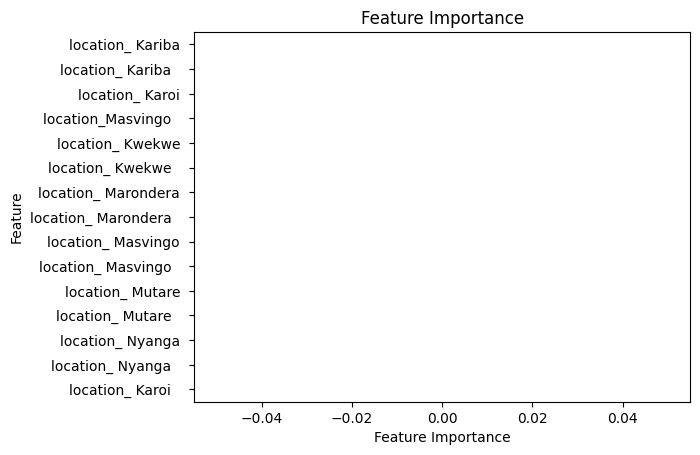

In [ ]:
importances = gs2.best_estimator_.named_steps["xgboost"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index= X_train.columns).sort_values()

# Plot series
feat_imp.head(15).plot(kind="barh")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

>These are features that didnt have a sugnificant contribution, location of some contributed to a Degree of defaulting ot not with this model.



---



>

>**Model Description how it is predicting probability of default.**

1. *Pipeline Structure*:

The pipeline **pipe2** consists of two steps:

**a) Scaling**: A **FunctionTransformer** that doesn't actually perform any scaling in this case (it applies an identity function lambda x: x). This step might be a placeholder for future scaling if needed.

**b) xgboost**: An **XGBClassifier** model, which is the core of the prediction process.

2. *XGBoost Configuration*:

The parameters dictionary defines hyperparameters for the XGBoost model:
max_depth (70): Controls the maximum depth of each decision tree. Deeper trees can capture more complex relationships but are more prone to overfitting.
n_estimators (100): The number of decision trees in the ensemble.
learning_rate (0.09): Shrinks the contribution of each tree, making the model more robust and less prone to overfitting.
tree_method ('hist'): Specifies the tree construction algorithm. 'hist' is a fast and efficient histogram-based method.
min_child_weight (1): Controls the minimum sum of instance weights needed in a child node. Higher values prevent overfitting by requiring more evidence to create splits.

3. *Prediction Process*:

**Input**: The pipeline takes a loan application's features as input.

**Scaling (No-op)**: The FunctionTransformer simply passes the features through without modification.

**XGBoost Prediction**: The XGBClassifier applies the ensemble of decision trees, each making a prediction based on different feature combinations. These predictions are combined through weighted voting.

**Probability Output**: The model outputs a probability score indicating the likelihood of default for the given loan application.

**Thresholding (Implicit)**: The XGBClassifier likely has a default threshold (usually 0.5) to classify the loan as "defaulting" or "non-defaulting" based on the probability score

>

>

>***Instances where xgboost predict well.***

> 1. More trees generally improve accuracy but increase computation time. And this lead to its limitation as well as low machine power leads to model being expensive. As we see in this presentation.

>2. Deeper trees can capture more complex relationships but are more prone to overfitting. This lead to minimising Deeper trees, but Gridsearch did the best with provided parms.

>3. Shrinking the contribution of each tree with learning_rate (0.09), making the model more robust and less prone to overfitting.

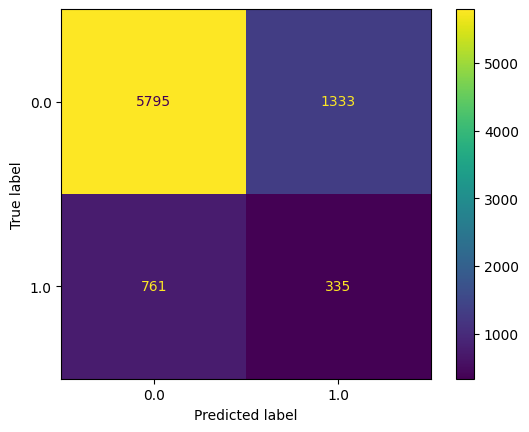

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_modelxg, X_test, y_test)

>